_Alberto Medrano Fernández_

# Exploratory Data Analysis (EDA)

---

## Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

---

## Load dataset

In [2]:
hikari_2022 = pd.read_csv('ALLFLOWMETER_HIKARI2022.csv', sep=',')
hikari_2022

,Unnamed: 0,uid,originh,originp,responh,responp,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,...,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size,bwd_last_window_size,attack_category,Label
0,0,Cmu9v81jToQyRF1gbk,184.0.48.168,38164,184.0.48.150,50443,0 days 00:00:00.000060,1,1,0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,64240,0,64240,0,Benign,0
1,1,CO21hl3TWkuXTOgajk,184.0.48.169,43068,184.0.48.150,50443,0 days 00:00:00.000083,1,1,0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,64240,0,64240,0,Benign,0
2,2,CBLJ6L19FP0MfYX7Oh,184.0.48.124,5678,255.255.255.255,5678,0 days 00:01:59.996602,3,0,3,...,5.999912e+07,1.199966e+08,5.999830e+07,1156.846698,0,0,0,0,Benign,0
3,3,ChTG451zJ7hUYOcqje,184.0.48.124,5678,255.255.255.255,5678,0 days 00:00:59.996909,2,0,2,...,5.999691e+07,5.999691e+07,5.999691e+07,0.000000,0,0,0,0,Benign,0
4,4,Cn9y6E2KVxzQbs5wjc,184.0.48.124,5678,255.255.255.255,5678,0 days 00:00:59.992130,2,0,2,...,5.999213e+07,5.999213e+07,5.999213e+07,0.000000,0,0,0,0,Benign,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228248,16634,Clt16PPxzrXEtpa5d,184.0.48.20,53866,184.0.48.255,1947,0 days 00:00:00.000027,2,0,2,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0,0,0,0,XMRIGCC CryptoMiner,1
228249,53170,Cs8RA72uHDiQa5ch2k,184.0.48.20,54318,184.0.48.255,1947,0 days 00:00:00.000027,2,0,2,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0,0,0,0,XMRIGCC CryptoMiner,1
228250,53529,Cy4dqo4YEq5YGxjUXa,184.0.48.20,65355,184.0.48.255,1947,0 days 00:00:00,2,0,2,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0,0,0,0,XMRIGCC CryptoMiner,1
228251,86308,CFXfNV3OTG04e0UnP4,184.0.48.20,53642,184.0.48.255,1947,0 days 00:00:00.000054,2,0,2,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0,0,0,0,XMRIGCC CryptoMiner,1


In [3]:
hikari_2022 = hikari_2022.drop(columns=['Unnamed: 0'])
hikari_2022

,uid,originh,originp,responh,responp,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,...,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size,bwd_last_window_size,attack_category,Label
0,Cmu9v81jToQyRF1gbk,184.0.48.168,38164,184.0.48.150,50443,0 days 00:00:00.000060,1,1,0,0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,64240,0,64240,0,Benign,0
1,CO21hl3TWkuXTOgajk,184.0.48.169,43068,184.0.48.150,50443,0 days 00:00:00.000083,1,1,0,0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,64240,0,64240,0,Benign,0
2,CBLJ6L19FP0MfYX7Oh,184.0.48.124,5678,255.255.255.255,5678,0 days 00:01:59.996602,3,0,3,0,...,5.999912e+07,1.199966e+08,5.999830e+07,1156.846698,0,0,0,0,Benign,0
3,ChTG451zJ7hUYOcqje,184.0.48.124,5678,255.255.255.255,5678,0 days 00:00:59.996909,2,0,2,0,...,5.999691e+07,5.999691e+07,5.999691e+07,0.000000,0,0,0,0,Benign,0
4,Cn9y6E2KVxzQbs5wjc,184.0.48.124,5678,255.255.255.255,5678,0 days 00:00:59.992130,2,0,2,0,...,5.999213e+07,5.999213e+07,5.999213e+07,0.000000,0,0,0,0,Benign,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228248,Clt16PPxzrXEtpa5d,184.0.48.20,53866,184.0.48.255,1947,0 days 00:00:00.000027,2,0,2,0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0,0,0,0,XMRIGCC CryptoMiner,1
228249,Cs8RA72uHDiQa5ch2k,184.0.48.20,54318,184.0.48.255,1947,0 days 00:00:00.000027,2,0,2,0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0,0,0,0,XMRIGCC CryptoMiner,1
228250,Cy4dqo4YEq5YGxjUXa,184.0.48.20,65355,184.0.48.255,1947,0 days 00:00:00,2,0,2,0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0,0,0,0,XMRIGCC CryptoMiner,1
228251,CFXfNV3OTG04e0UnP4,184.0.48.20,53642,184.0.48.255,1947,0 days 00:00:00.000054,2,0,2,0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0,0,0,0,XMRIGCC CryptoMiner,1


## Features

In [4]:
hikari_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228253 entries, 0 to 228252
Data columns (total 87 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   uid                       228253 non-null  object 
 1   originh                   228253 non-null  object 
 2   originp                   228253 non-null  int64  
 3   responh                   228253 non-null  object 
 4   responp                   228253 non-null  int64  
 5   flow_duration             228253 non-null  object 
 6   fwd_pkts_tot              228253 non-null  int64  
 7   bwd_pkts_tot              228253 non-null  int64  
 8   fwd_data_pkts_tot         228253 non-null  int64  
 9   bwd_data_pkts_tot         228253 non-null  int64  
 10  fwd_pkts_per_sec          228253 non-null  float64
 11  bwd_pkts_per_sec          228253 non-null  float64
 12  flow_pkts_per_sec         228253 non-null  float64
 13  down_up_ratio             228253 non-null  f

In [5]:
hikari_2022.shape

(228253, 87)

In [6]:
# Set pandas to show all the rows
pd.set_option('display.max_rows', None)

In [7]:
hikari_2022.isnull().sum()

uid                         0
originh                     0
originp                     0
responh                     0
responp                     0
flow_duration               0
fwd_pkts_tot                0
bwd_pkts_tot                0
fwd_data_pkts_tot           0
bwd_data_pkts_tot           0
fwd_pkts_per_sec            0
bwd_pkts_per_sec            0
flow_pkts_per_sec           0
down_up_ratio               0
fwd_header_size_tot         0
fwd_header_size_min         0
fwd_header_size_max         0
bwd_header_size_tot         0
bwd_header_size_min         0
bwd_header_size_max         0
flow_FIN_flag_count         0
flow_SYN_flag_count         0
flow_RST_flag_count         0
fwd_PSH_flag_count          0
bwd_PSH_flag_count          0
flow_ACK_flag_count         0
fwd_URG_flag_count          0
bwd_URG_flag_count          0
flow_CWR_flag_count         0
flow_ECE_flag_count         0
fwd_pkts_payload.min        0
fwd_pkts_payload.max        0
fwd_pkts_payload.tot        0
fwd_pkts_p

In [8]:
hikari_2022.nunique()

uid                         228253
originh                       5803
originp                      56539
responh                        101
responp                       1012
flow_duration               118838
fwd_pkts_tot                   163
bwd_pkts_tot                   144
fwd_data_pkts_tot              100
bwd_data_pkts_tot              129
fwd_pkts_per_sec            125958
bwd_pkts_per_sec            116061
flow_pkts_per_sec           132039
down_up_ratio                  750
fwd_header_size_tot            717
fwd_header_size_min              9
fwd_header_size_max             11
bwd_header_size_tot            384
bwd_header_size_min              8
bwd_header_size_max             10
flow_FIN_flag_count             37
flow_SYN_flag_count              8
flow_RST_flag_count             11
fwd_PSH_flag_count              77
bwd_PSH_flag_count             114
flow_ACK_flag_count            220
fwd_URG_flag_count               1
bwd_URG_flag_count               1
flow_CWR_flag_count 

In [9]:
# Reset the option to its default value
pd.reset_option('display.max_rows')

---

### Distribution of features 'fwd_URG_flag_count', 'bwd_URG_flag_count'

In [10]:
hikari_2022["fwd_URG_flag_count"].value_counts()

fwd_URG_flag_count
0    228253
Name: count, dtype: int64

In [11]:
hikari_2022["bwd_URG_flag_count"].value_counts()

bwd_URG_flag_count
0    228253
Name: count, dtype: int64

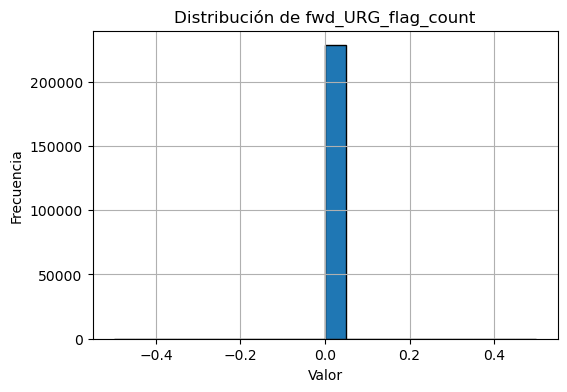

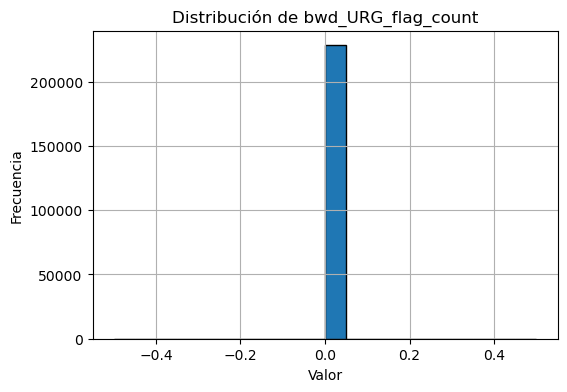

In [12]:
variables = ['fwd_URG_flag_count', 'bwd_URG_flag_count']

for variable in variables:
    plt.figure(figsize=(6, 4))
    plt.hist(hikari_2022[variable], bins=20, edgecolor='black')
    plt.title(f'Distribución de {variable}')
    plt.xlabel('Valor')
    plt.ylabel('Frecuencia')
    plt.grid(True)
    plt.show()

### Delete features

In [13]:
hikari_2022 = hikari_2022.drop(columns=['uid', 'originh', 'responh', 'flow_duration', 'fwd_URG_flag_count', 
                                        'bwd_URG_flag_count', 'attack_category'])
hikari_2022

,originp,responp,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,fwd_pkts_per_sec,bwd_pkts_per_sec,flow_pkts_per_sec,down_up_ratio,...,idle.min,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size,bwd_last_window_size,Label
0,38164,50443,1,1,0,0,16644.063492,16644.063492,33288.126984,1.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,64240,0,64240,0,0
1,43068,50443,1,1,0,0,12052.597701,12052.597701,24105.195402,1.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,64240,0,64240,0,0
2,5678,5678,3,0,3,0,0.025001,0.000000,0.025001,0.0,...,5.999748e+07,5.999912e+07,1.199966e+08,5.999830e+07,1156.846698,0,0,0,0,0
3,5678,5678,2,0,2,0,0.033335,0.000000,0.033335,0.0,...,5.999691e+07,5.999691e+07,5.999691e+07,5.999691e+07,0.000000,0,0,0,0,0
4,5678,5678,2,0,2,0,0.033338,0.000000,0.033338,0.0,...,5.999213e+07,5.999213e+07,5.999213e+07,5.999213e+07,0.000000,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228248,53866,1947,2,0,2,0,73584.280702,0.000000,73584.280702,0.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0,0,0,0,1
228249,54318,1947,2,0,2,0,74235.469027,0.000000,74235.469027,0.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0,0,0,0,1
228250,65355,1947,2,0,2,0,0.000000,0.000000,0.000000,0.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0,0,0,0,1
228251,53642,1947,2,0,2,0,37117.734513,0.000000,37117.734513,0.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0,0,0,0,1


### Pearson correlation

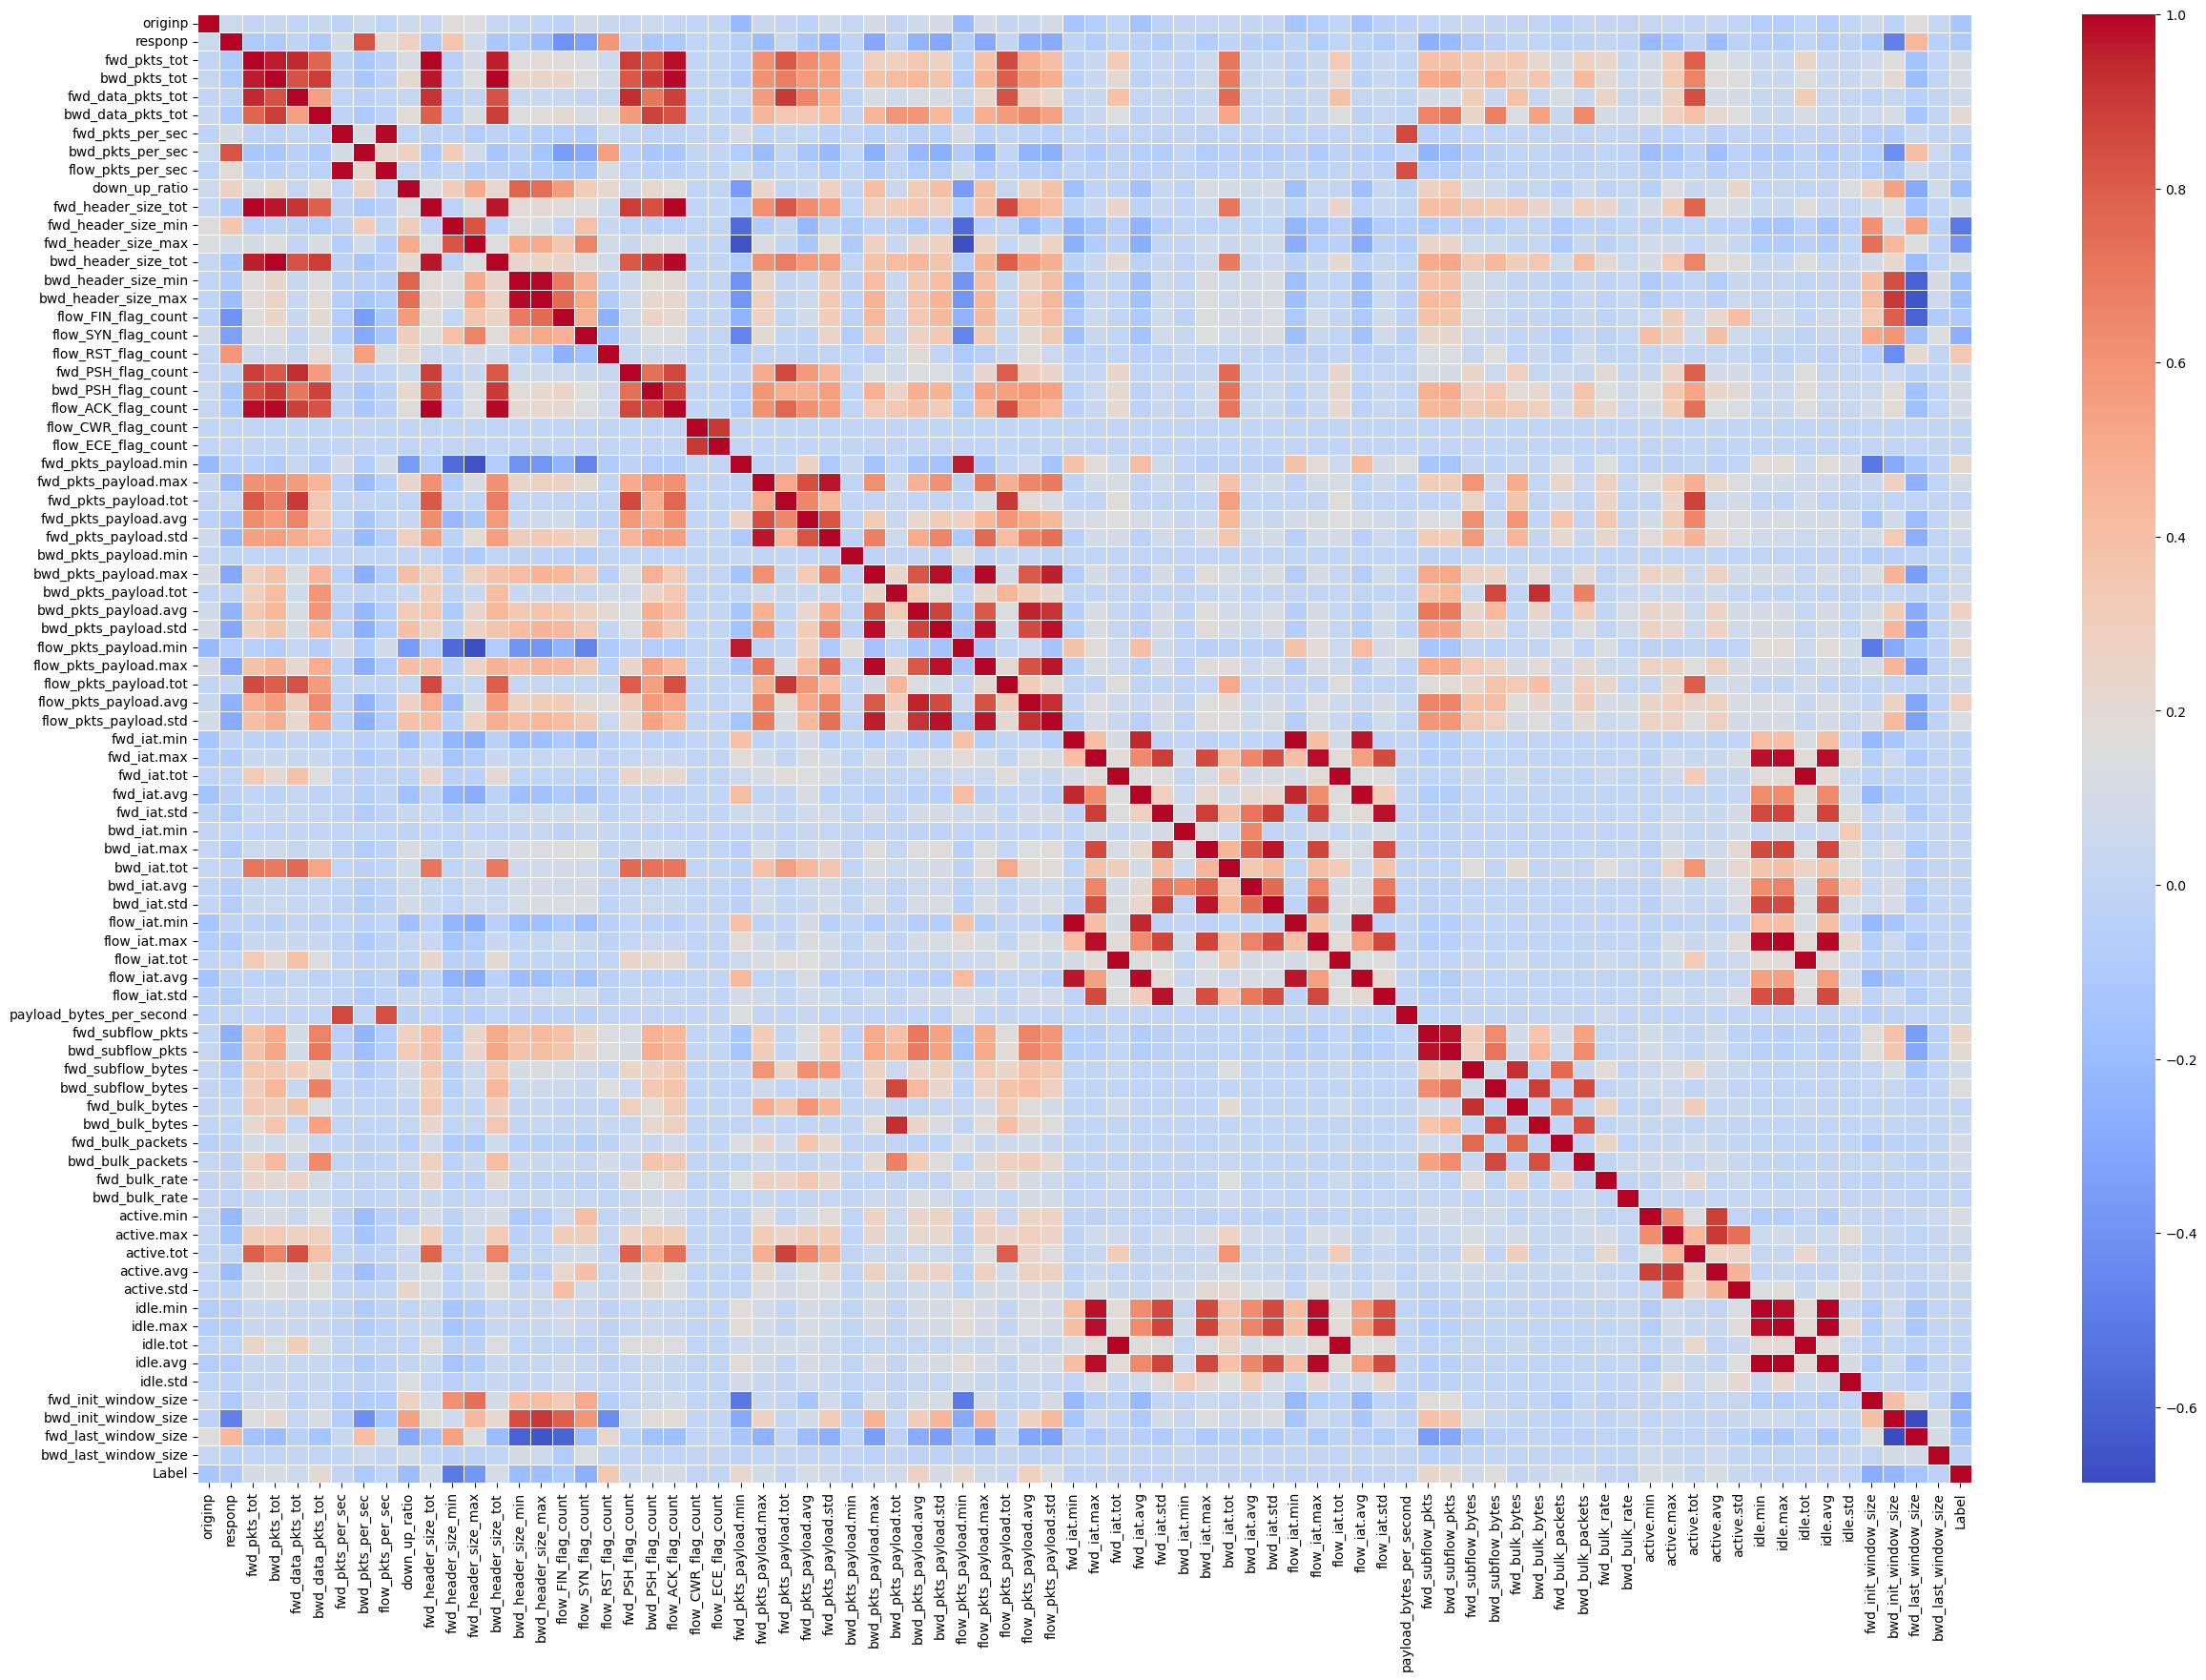

In [14]:
hikari_2022 = hikari_2022.select_dtypes(include=['float64', 'int64'])

# Pearson correlation coefficient
corr = hikari_2022.corr(method ='pearson')

# HeatMap
plt.figure(figsize=(30, 20))
correlation_matrix = hikari_2022.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.show()

### Nonlinear Relationships

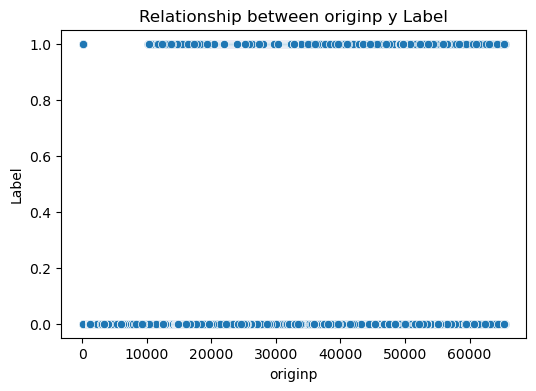

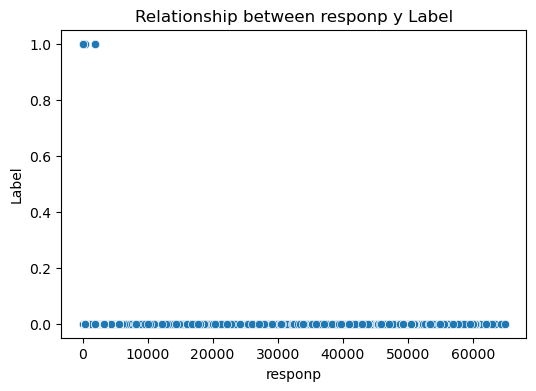

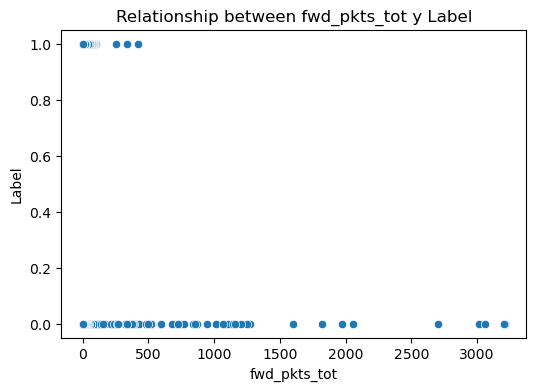

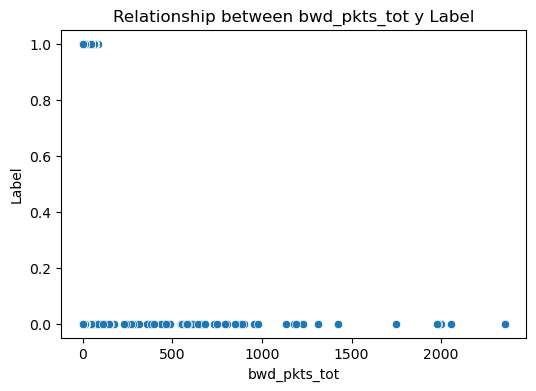

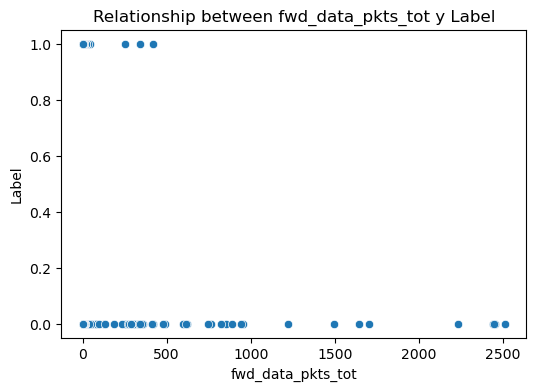

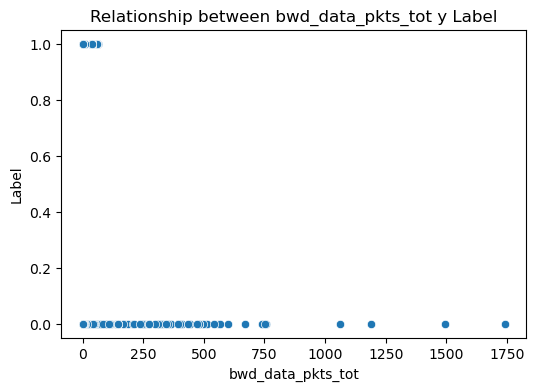

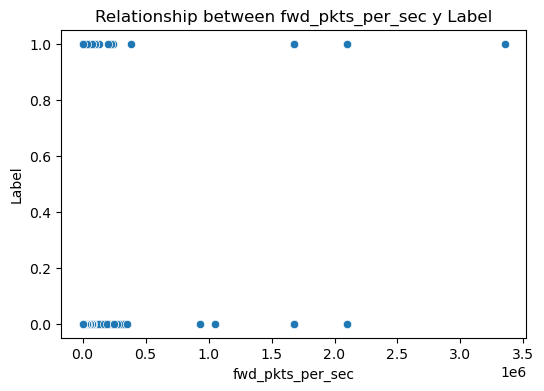

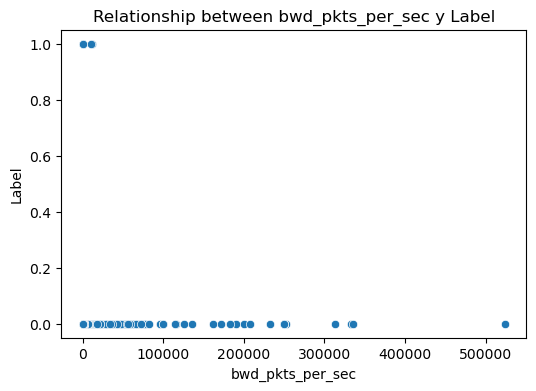

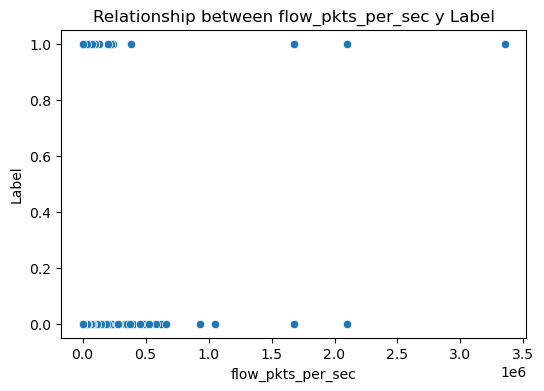

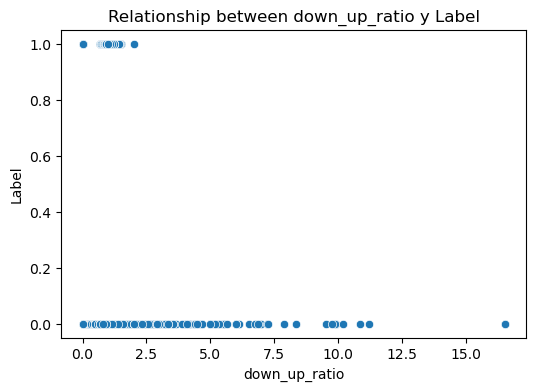

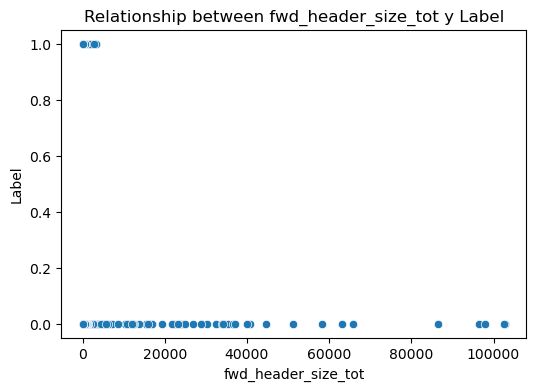

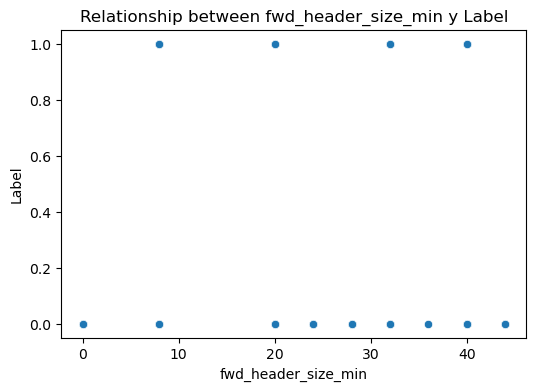

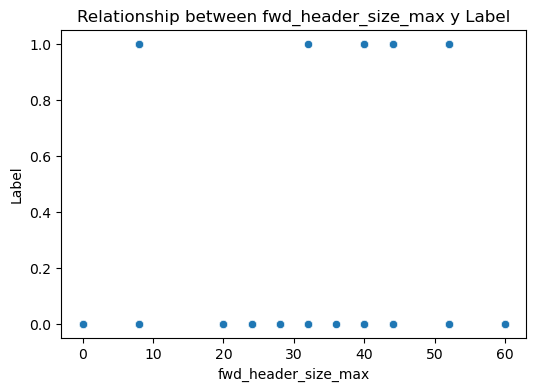

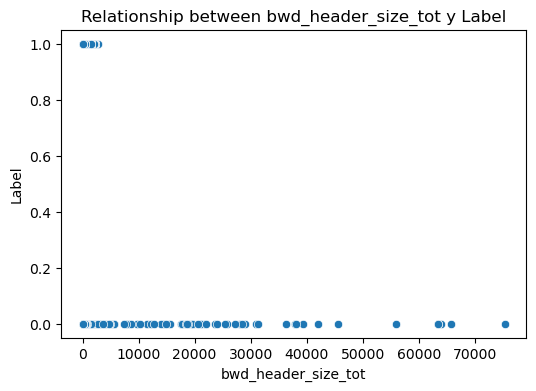

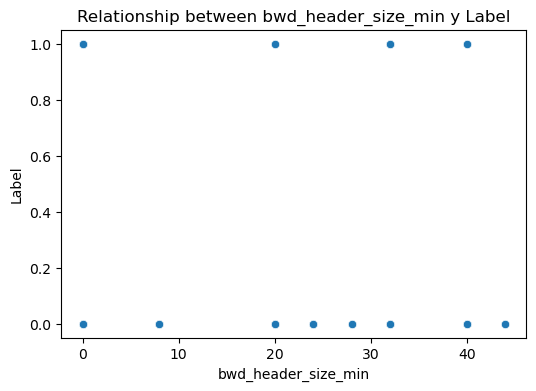

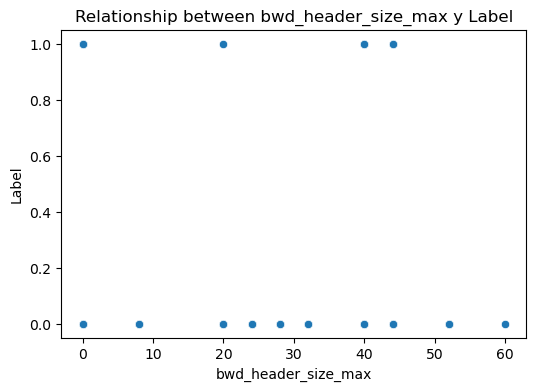

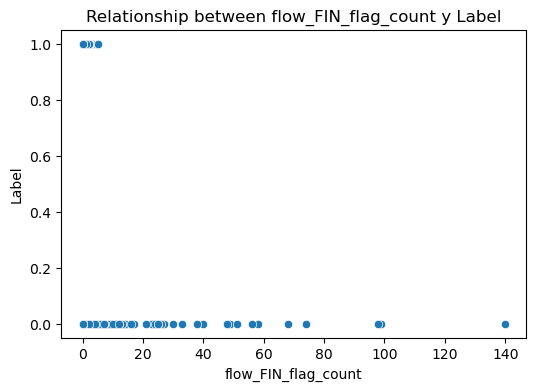

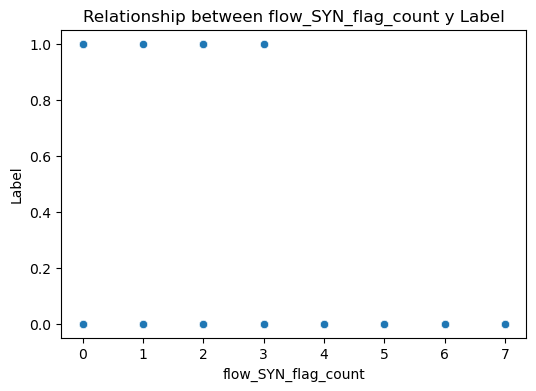

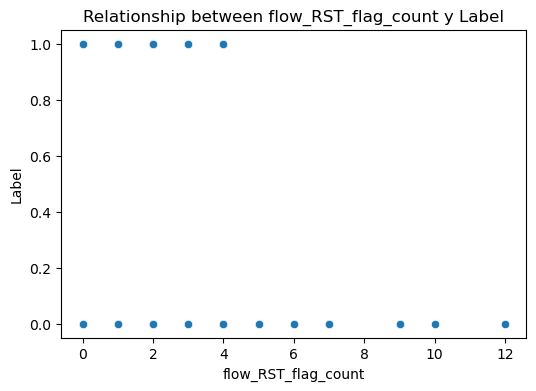

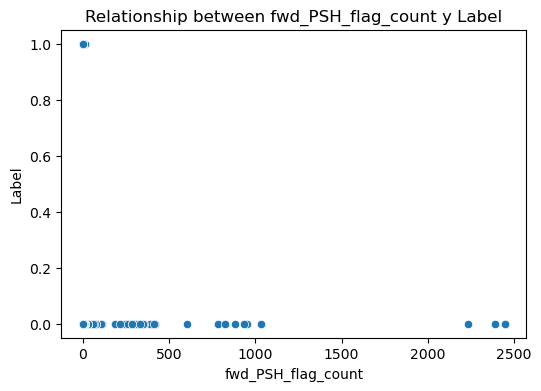

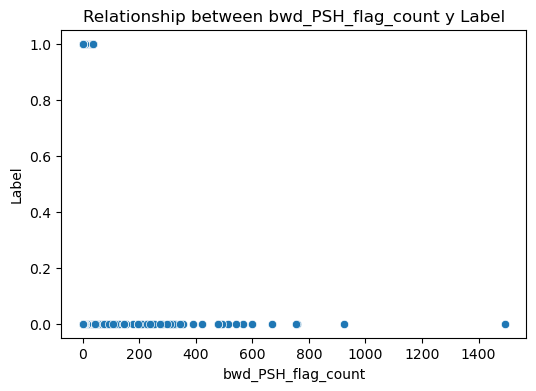

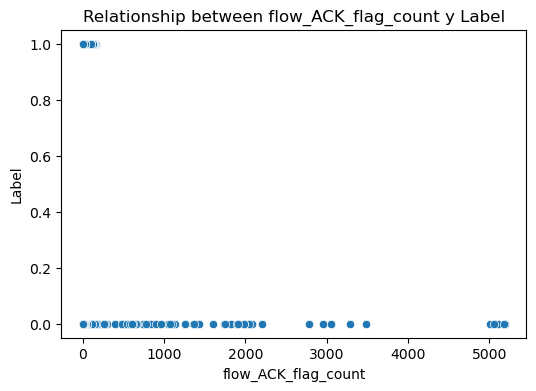

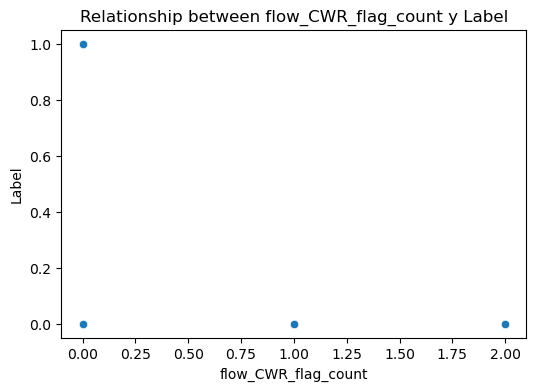

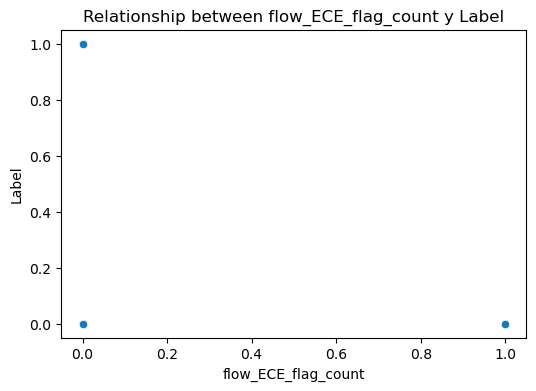

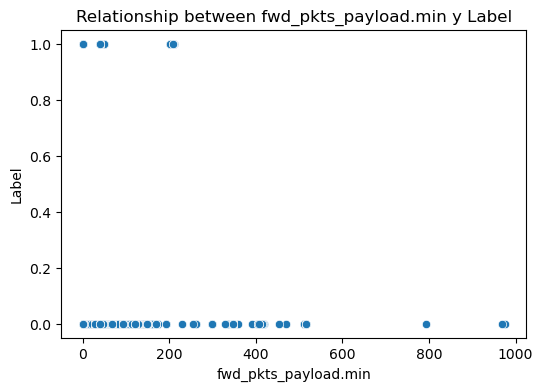

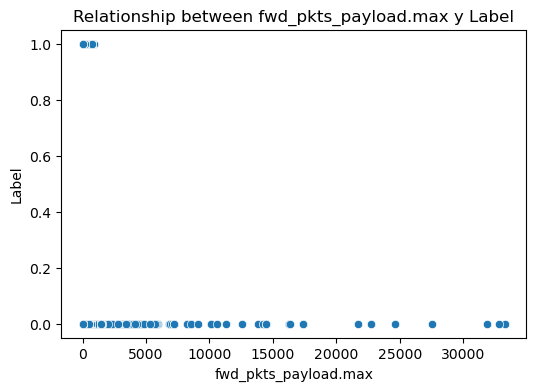

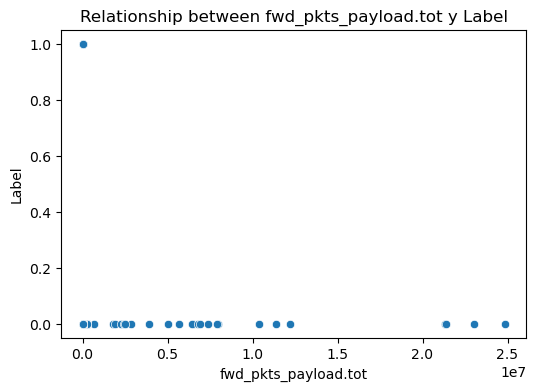

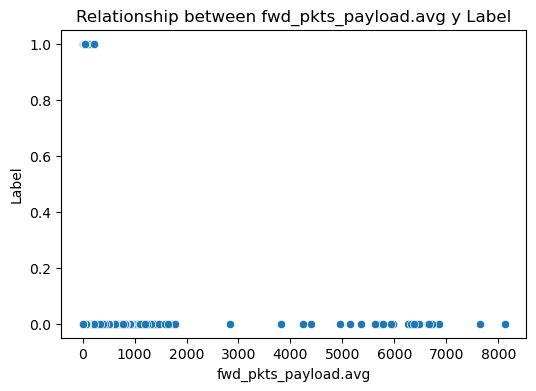

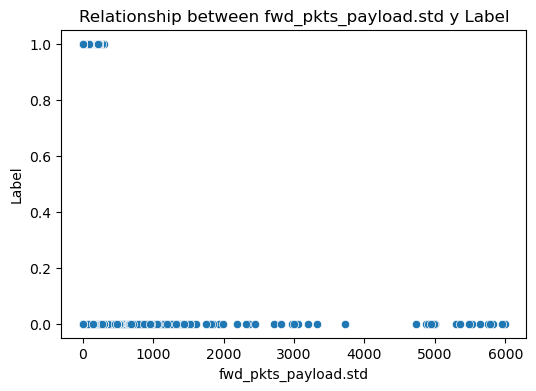

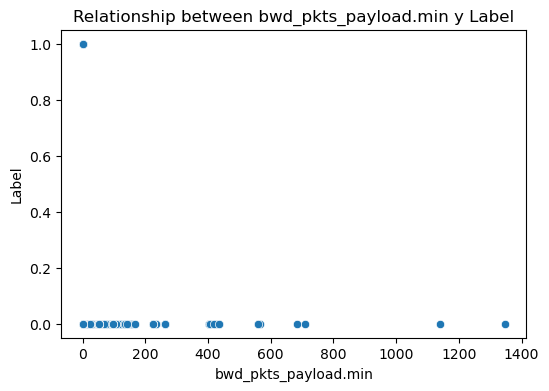

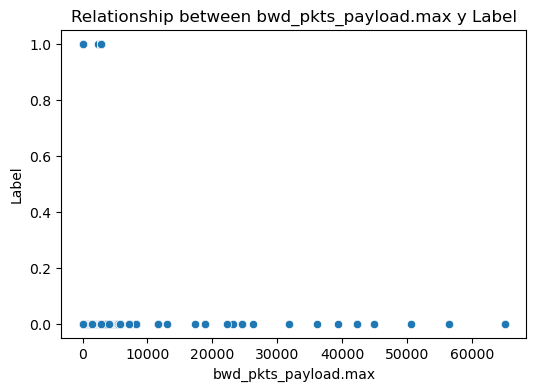

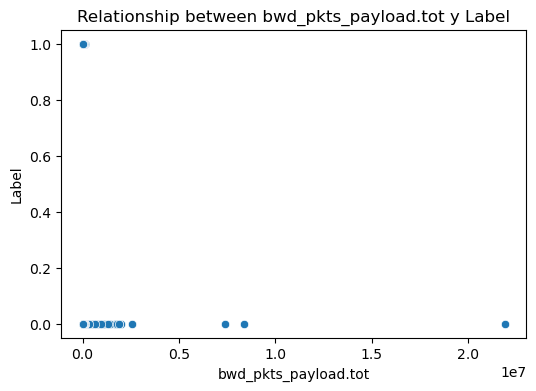

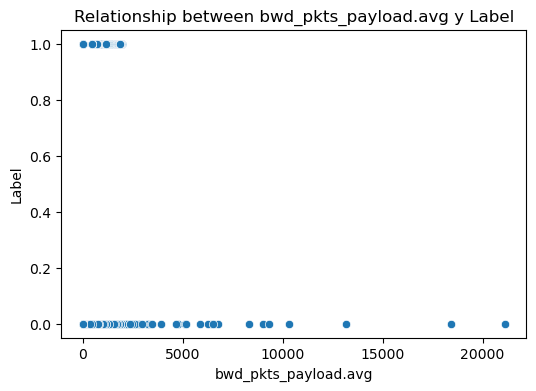

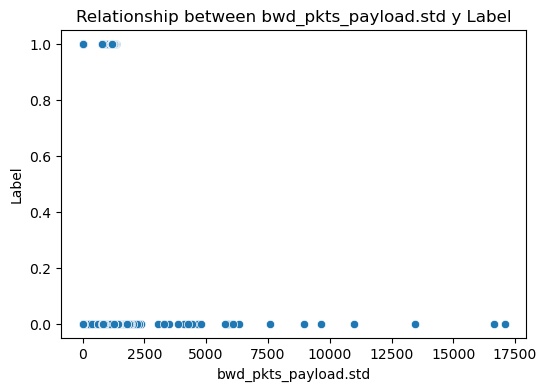

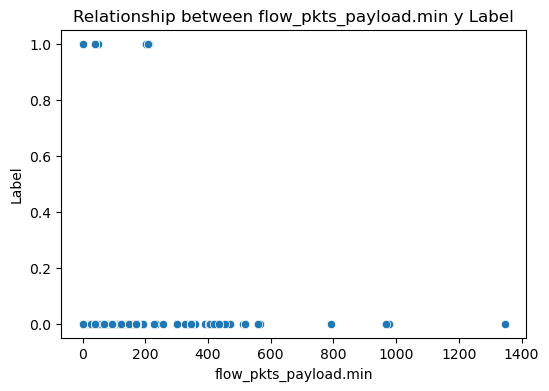

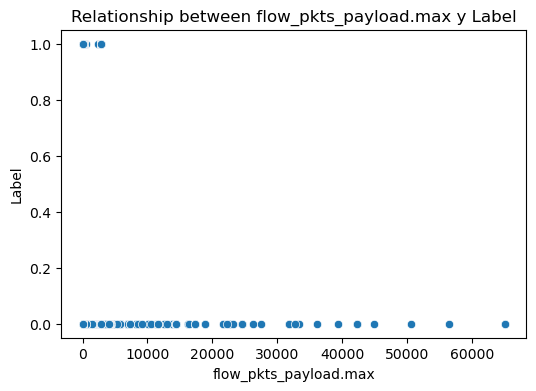

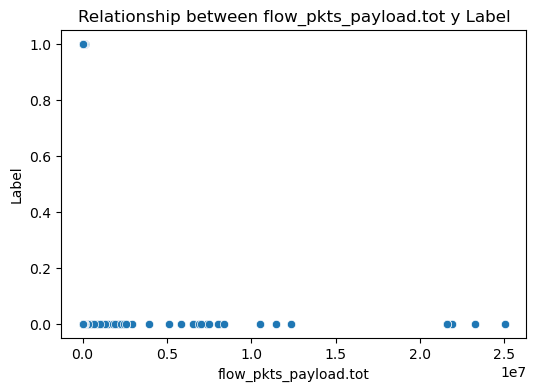

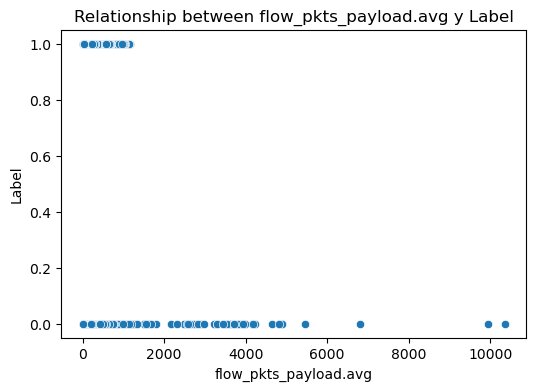

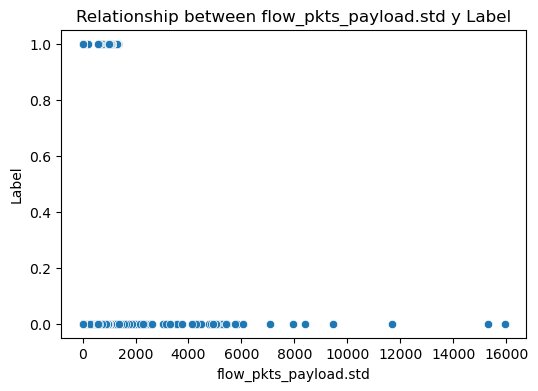

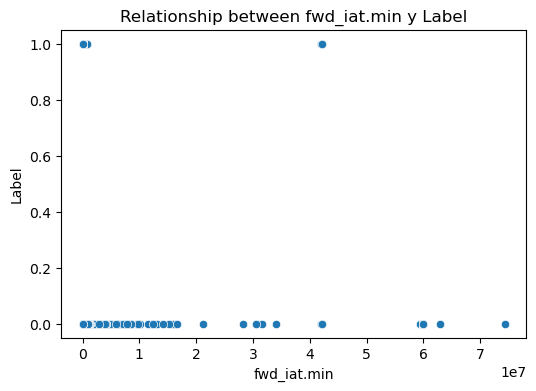

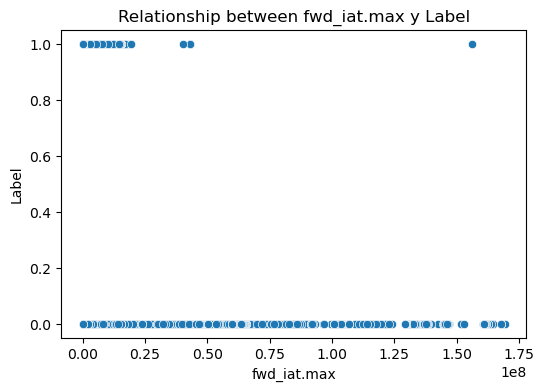

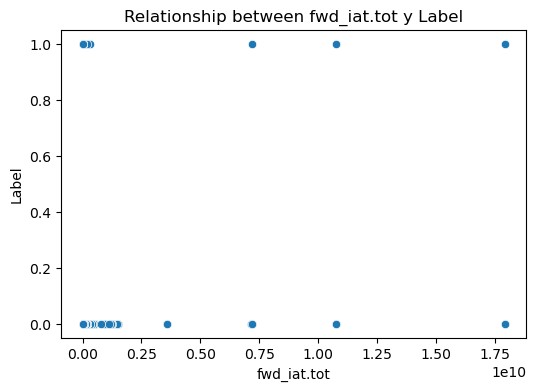

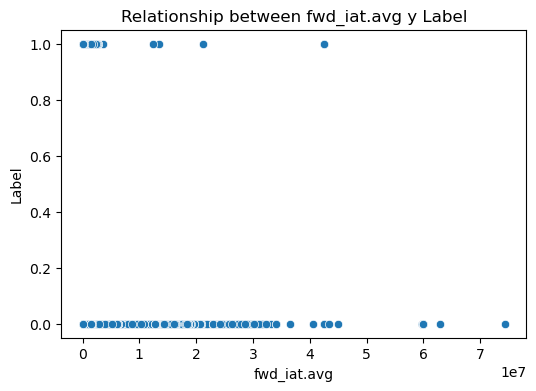

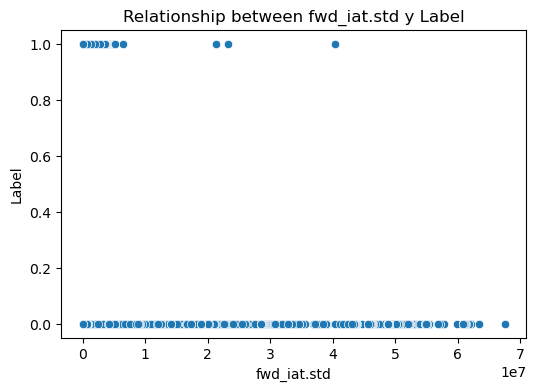

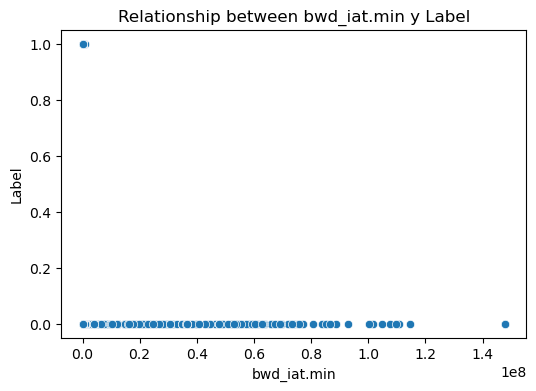

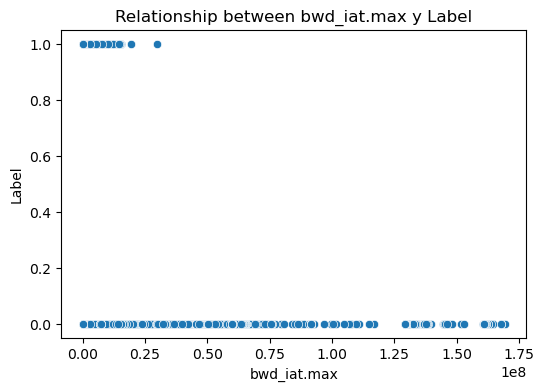

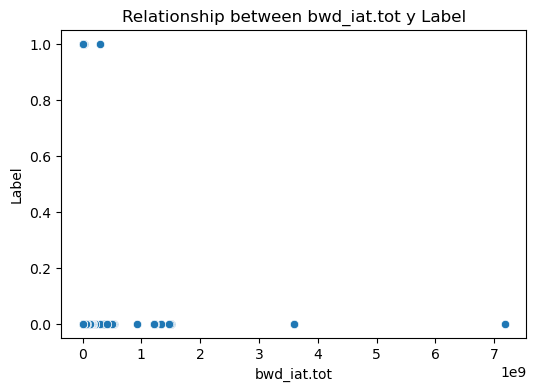

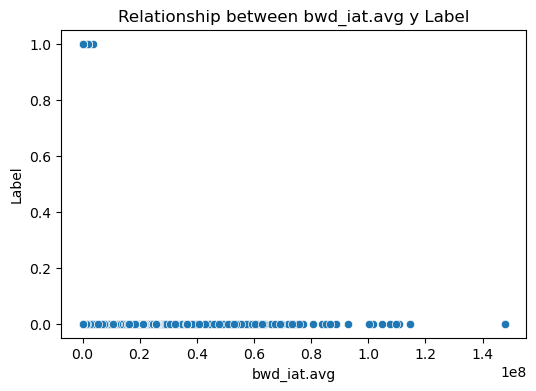

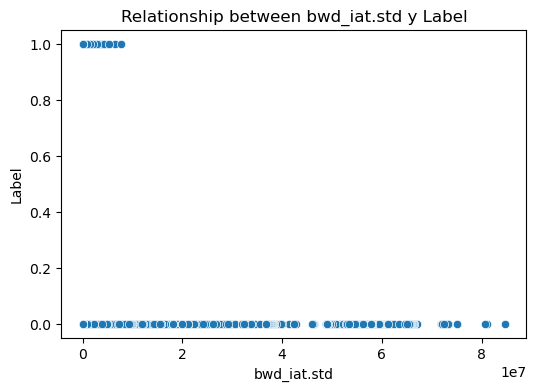

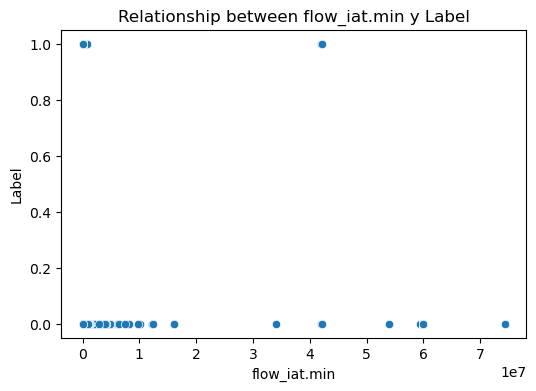

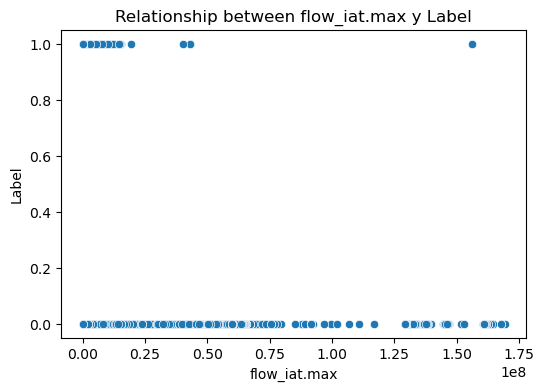

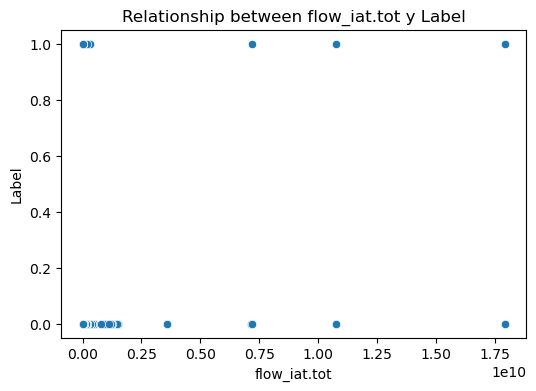

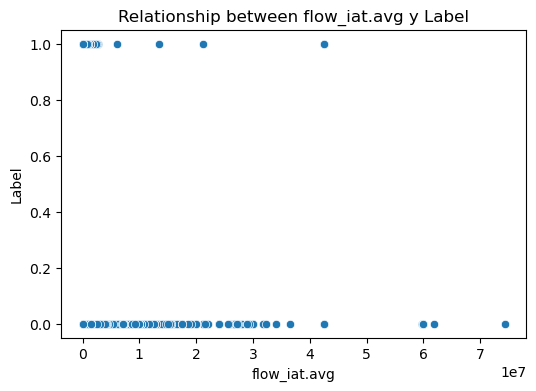

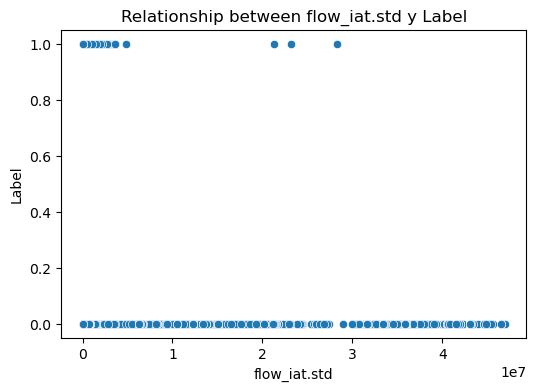

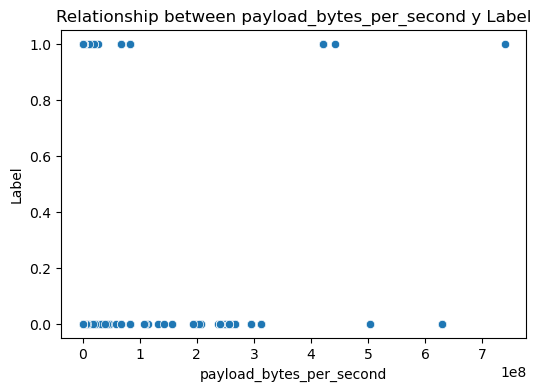

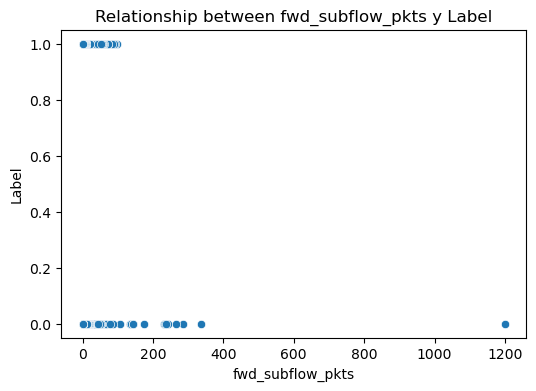

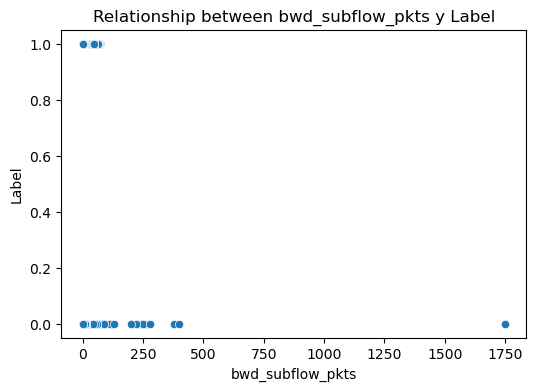

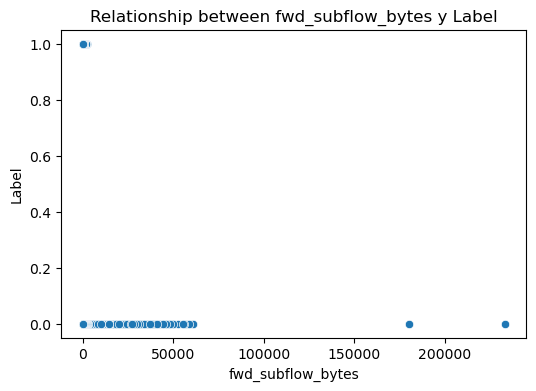

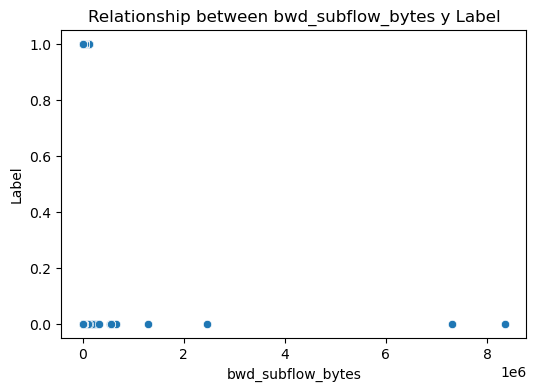

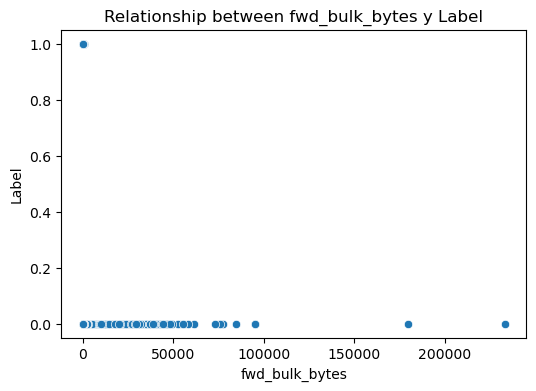

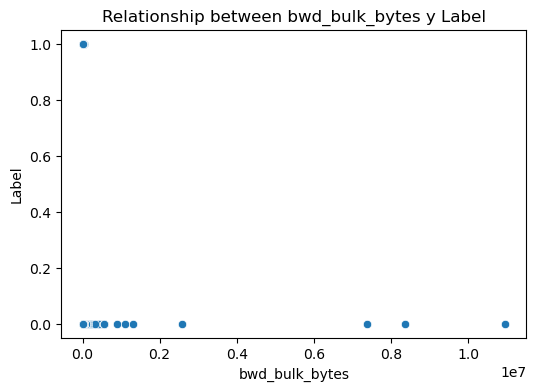

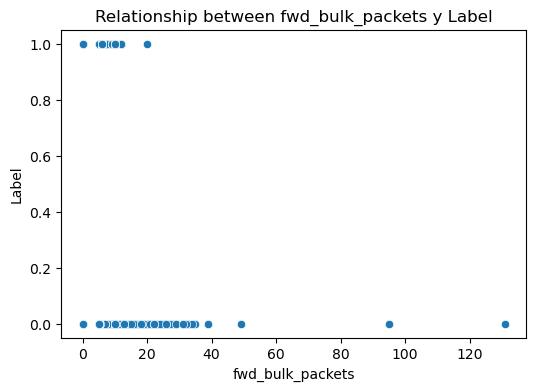

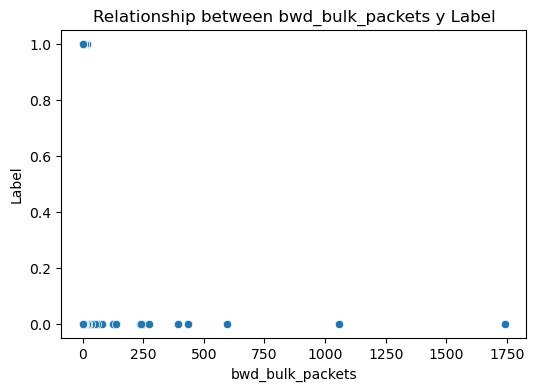

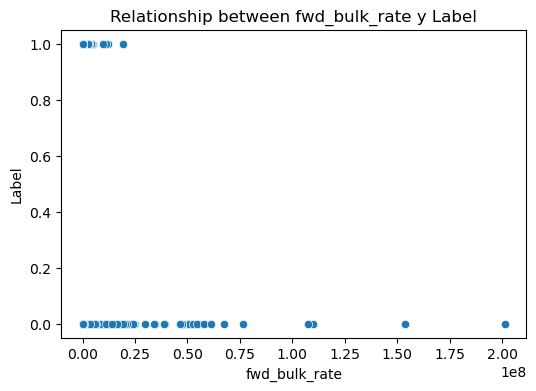

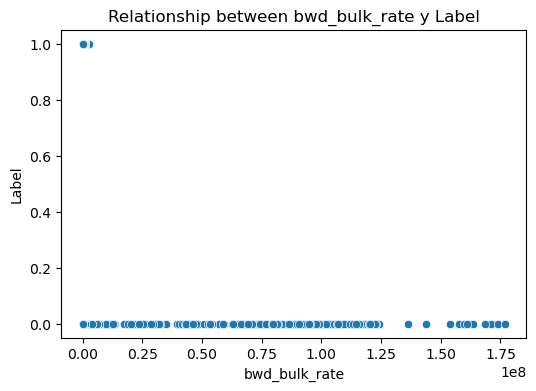

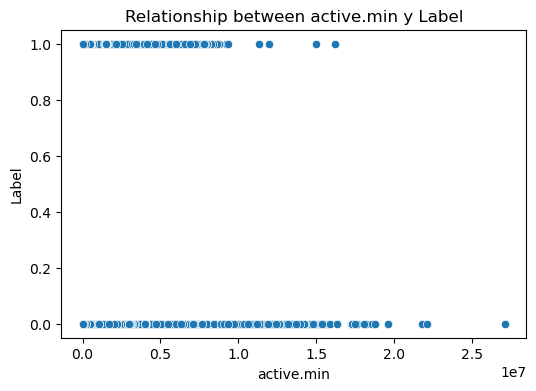

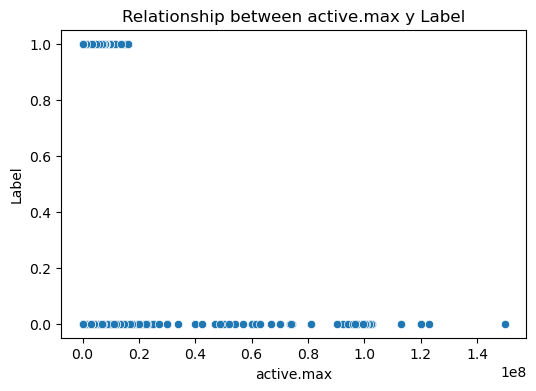

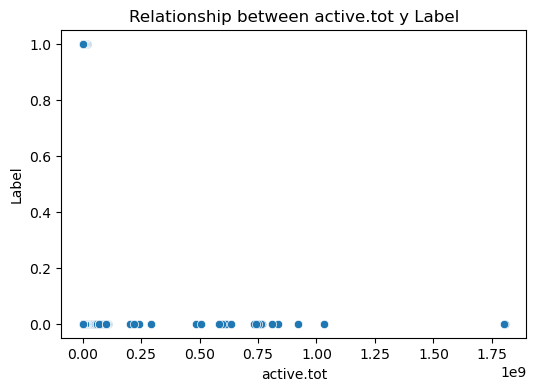

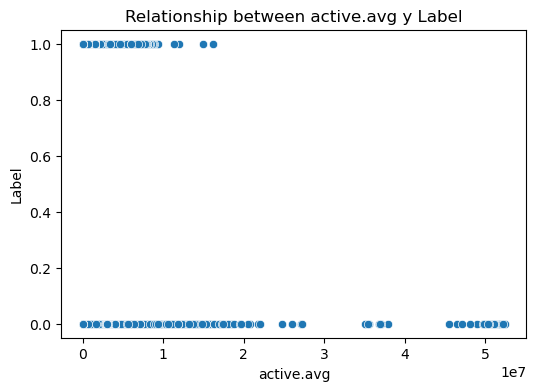

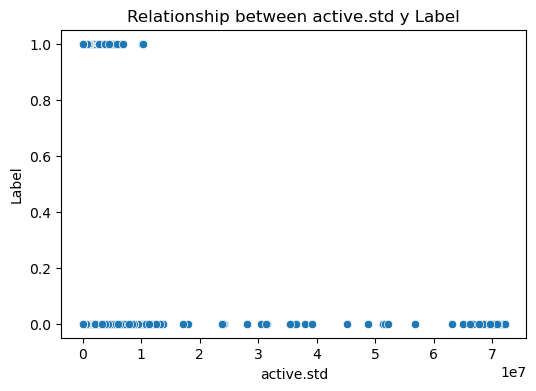

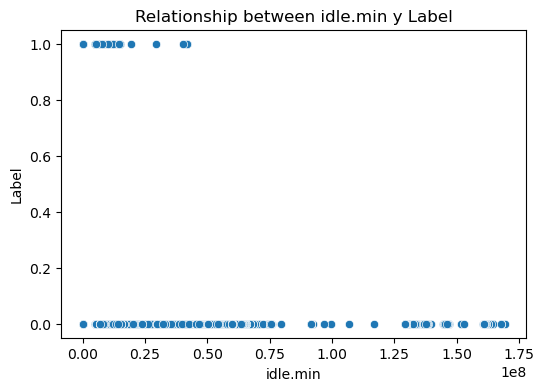

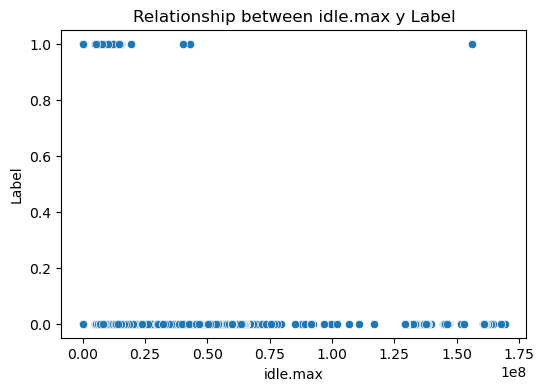

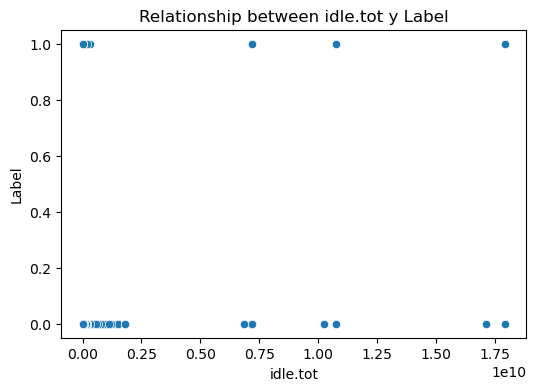

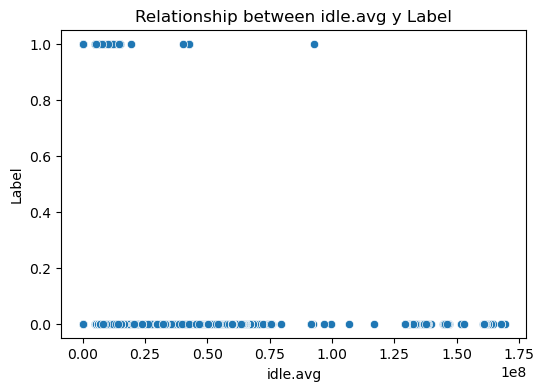

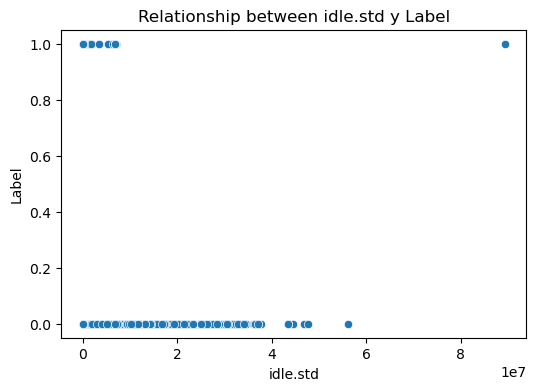

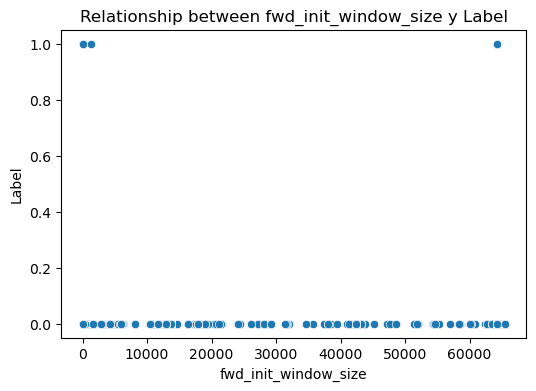

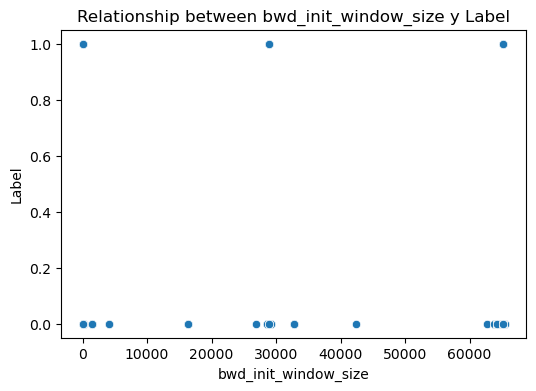

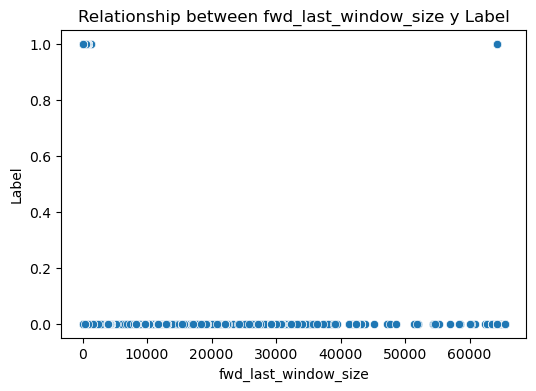

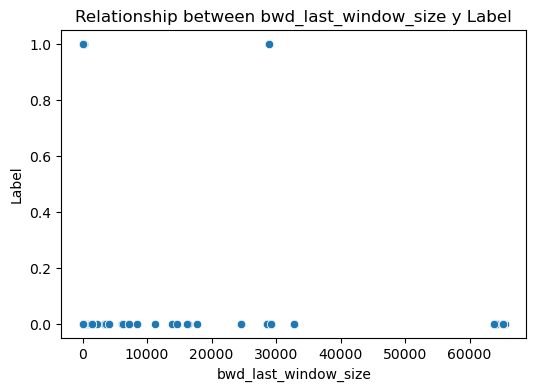

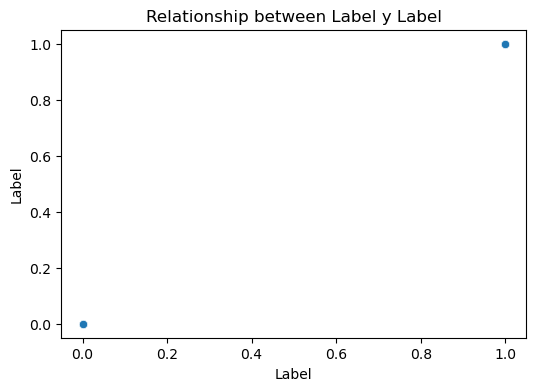

In [15]:
# Exploring possible non-linear relationships
for col in hikari_2022.columns:
    if hikari_2022[col].dtype in ['float64', 'int64']:
        plt.figure(figsize=(6, 4))
        sns.scatterplot(x=hikari_2022[col], y=hikari_2022['Label'])
        plt.title(f'Relationship between {col} y Label')
        plt.show()

### Delete features with correlation between 0.05 and -0.05

In [16]:
# Extract correlation with feature 'Label'
corr_with_target = corr['Label']

# Select only features with correlation between 0.05 and -0.05
relevant_features = corr_with_target[abs(corr_with_target) >= 0.05].index

# Filter DataFrame
hikari_2022_filtered = hikari_2022[relevant_features]

print("DataFrame after removing features:")
hikari_2022_filtered

DataFrame after removing features:


,originp,responp,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,bwd_pkts_per_sec,down_up_ratio,fwd_header_size_tot,fwd_header_size_min,...,bwd_subflow_bytes,fwd_bulk_packets,bwd_bulk_packets,active.min,active.max,active.avg,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size,Label
0,38164,50443,1,1,0,0,16644.063492,1.0,40,40,...,0.0,0.0,0.0,60.081482,60.081482,60.081482,64240,0,64240,0
1,43068,50443,1,1,0,0,12052.597701,1.0,40,40,...,0.0,0.0,0.0,82.969666,82.969666,82.969666,64240,0,64240,0
2,5678,5678,3,0,3,0,0.000000,0.0,24,8,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0,0,0,0
3,5678,5678,2,0,2,0,0.000000,0.0,16,8,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0,0,0,0
4,5678,5678,2,0,2,0,0.000000,0.0,16,8,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228248,53866,1947,2,0,2,0,0.000000,0.0,16,8,...,0.0,0.0,0.0,27.179718,27.179718,27.179718,0,0,0,1
228249,54318,1947,2,0,2,0,0.000000,0.0,16,8,...,0.0,0.0,0.0,26.941299,26.941299,26.941299,0,0,0,1
228250,65355,1947,2,0,2,0,0.000000,0.0,16,8,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0,0,0,1
228251,53642,1947,2,0,2,0,0.000000,0.0,16,8,...,0.0,0.0,0.0,53.882599,53.882599,53.882599,0,0,0,1


### Statistical summary of the remaining features

In [17]:
hikari_2022_filtered.describe()

,originp,responp,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,bwd_pkts_per_sec,down_up_ratio,fwd_header_size_tot,fwd_header_size_min,...,bwd_subflow_bytes,fwd_bulk_packets,bwd_bulk_packets,active.min,active.max,active.avg,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size,Label
count,228253.000000,228253.000000,228253.000000,228253.000000,228253.000000,228253.000000,228253.000000,228253.000000,228253.000000,228253.000000,...,2.282530e+05,228253.000000,228253.000000,2.282530e+05,2.282530e+05,2.282530e+05,228253.000000,228253.000000,228253.000000,228253.000000
mean,36835.267633,7572.013108,7.544996,6.224299,1.500913,2.698269,2656.370370,0.686902,244.786776,31.047425,...,2.469663e+03,0.045987,0.286461,5.951125e+05,7.039324e+05,6.453595e+05,52971.788279,41171.981104,14400.563611,0.058483
std,17707.592755,15979.443219,20.630049,16.224580,14.701351,10.308325,6547.921713,0.410930,659.838747,8.824979,...,2.683386e+04,0.808990,5.088882,1.250759e+06,1.972918e+06,1.412372e+06,22837.106818,30975.991524,25183.061648,0.234656
min,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,23638.000000,443.000000,1.000000,1.000000,0.000000,0.000000,0.563013,0.666667,40.000000,32.000000,...,0.000000e+00,0.000000,0.000000,8.606911e+01,8.797646e+01,8.797646e+01,64240.000000,0.000000,63.000000,0.000000
50%,40172.000000,443.000000,6.000000,5.000000,0.000000,0.000000,58.353541,0.833333,200.000000,32.000000,...,0.000000e+00,0.000000,0.000000,1.277614e+04,1.552296e+04,1.538396e+04,64240.000000,65160.000000,312.000000,0.000000
75%,50846.000000,3306.000000,12.000000,11.000000,3.000000,6.000000,1305.707018,0.928571,392.000000,32.000000,...,2.723000e+03,0.000000,0.000000,2.868402e+05,4.211731e+05,3.470459e+05,65535.000000,65160.000000,19164.000000,0.000000
max,65534.000000,65000.000000,3214.000000,2357.000000,2514.000000,1743.000000,524288.000000,16.555556,102856.000000,44.000000,...,8.361821e+06,131.000000,1743.000000,2.714381e+07,1.499726e+08,5.251336e+07,65535.000000,65535.000000,65535.000000,1.000000


### Distribution of the remaining features

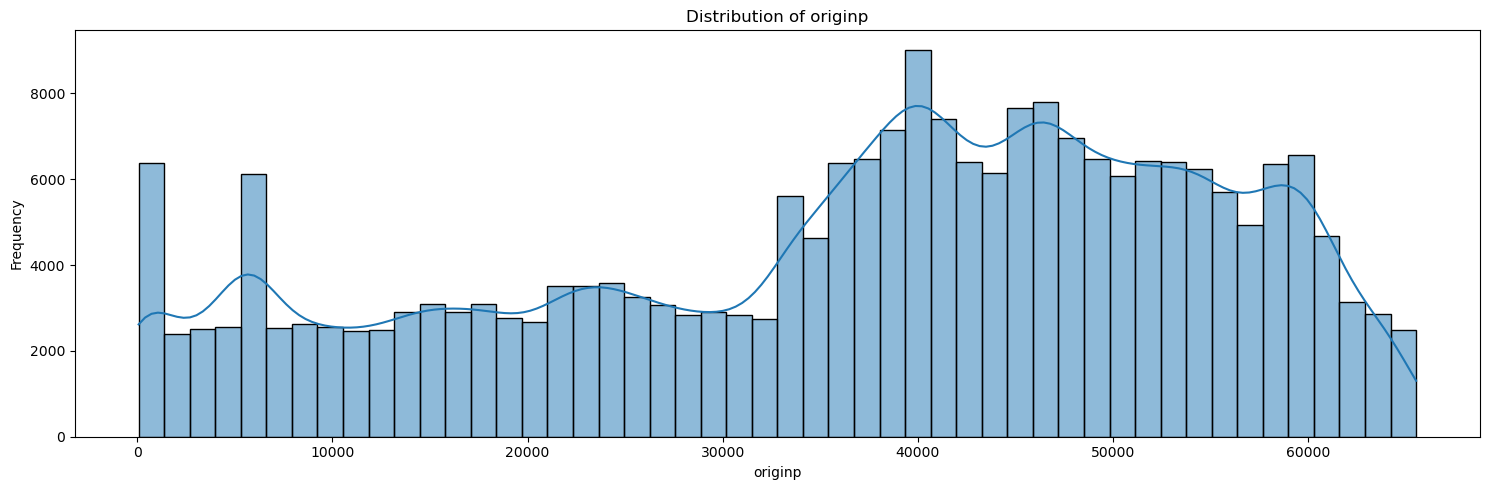

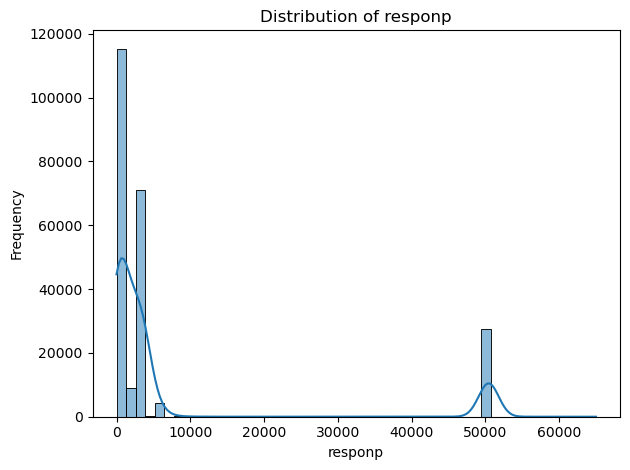

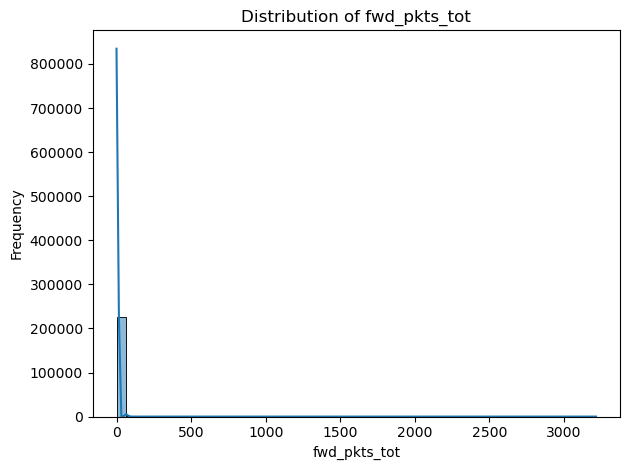

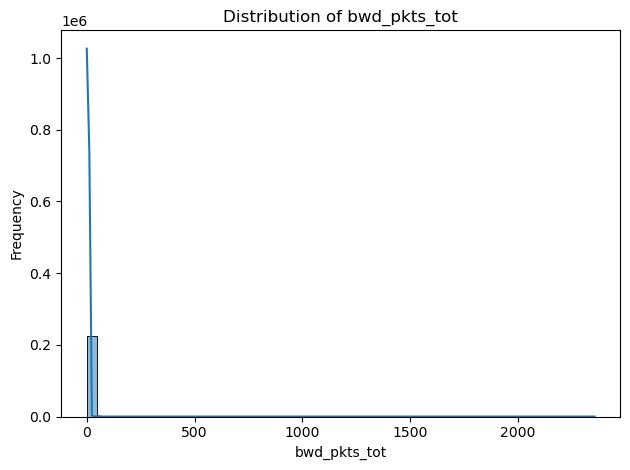

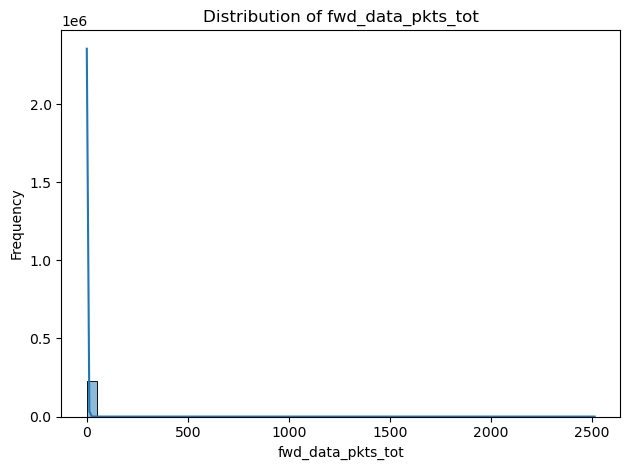

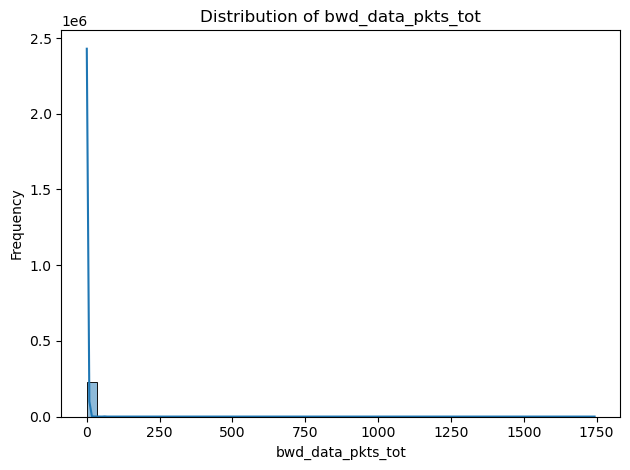

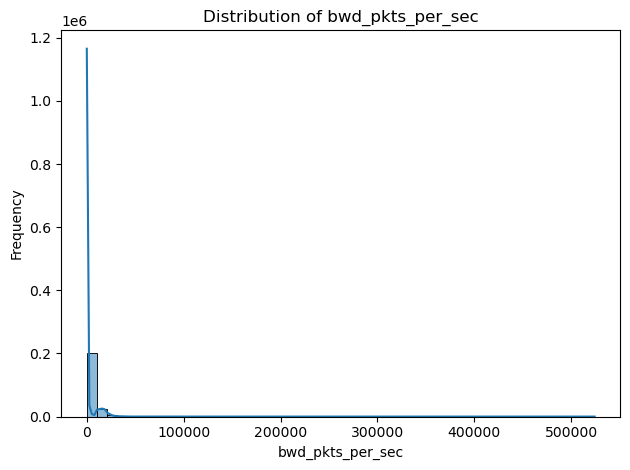

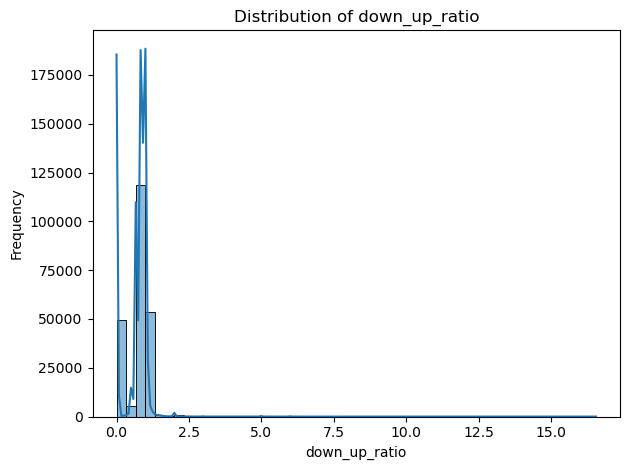

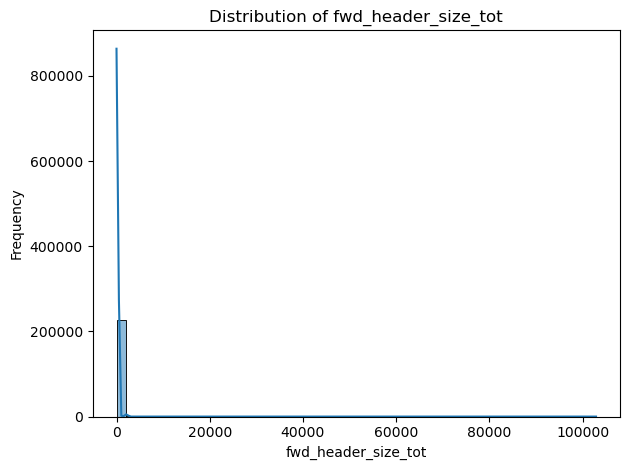

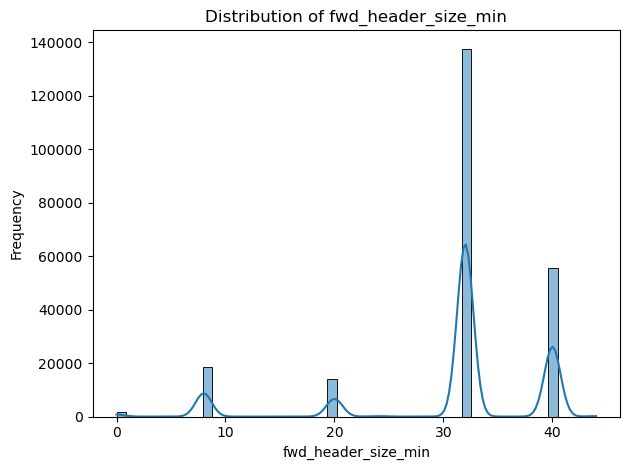

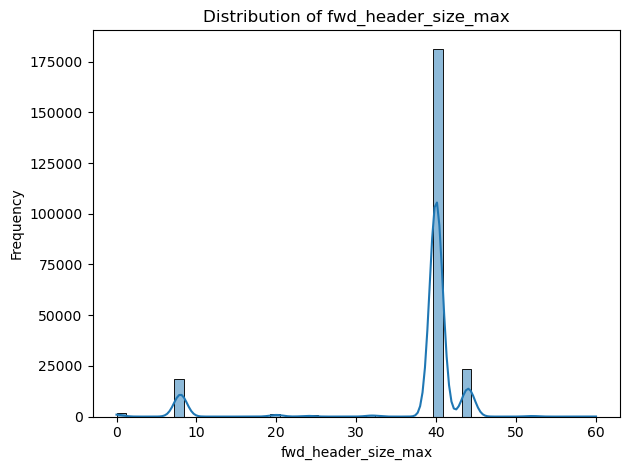

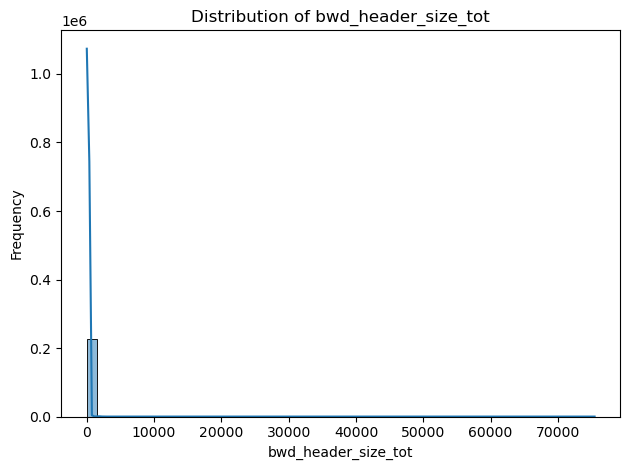

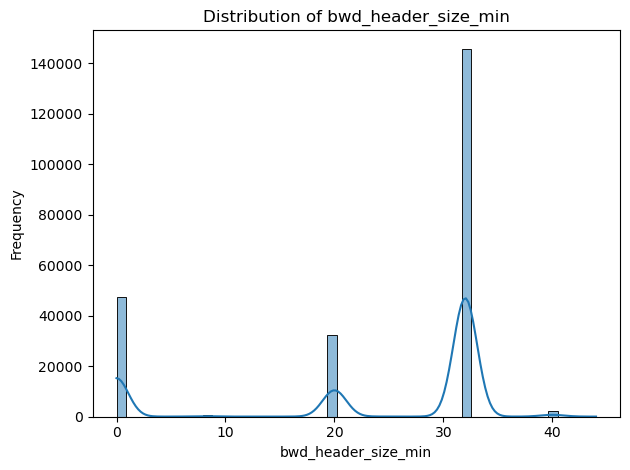

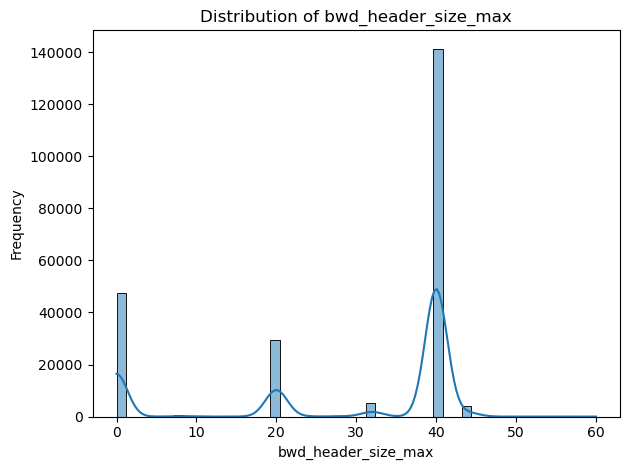

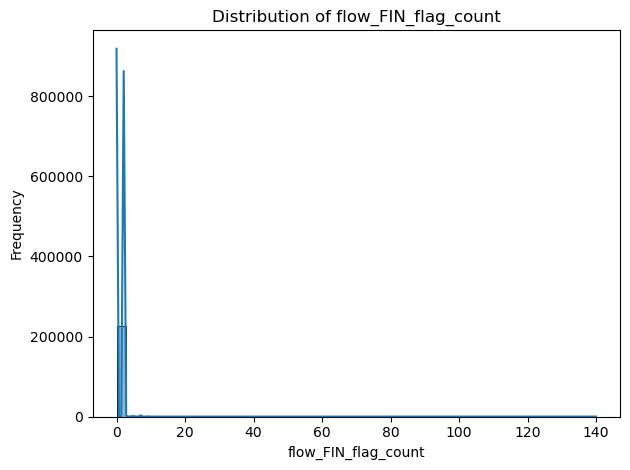

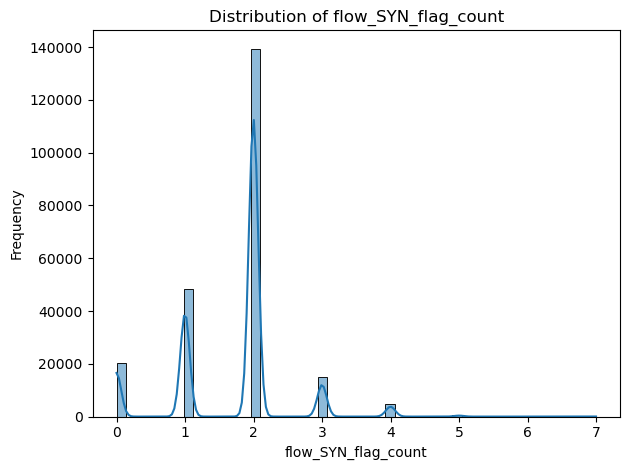

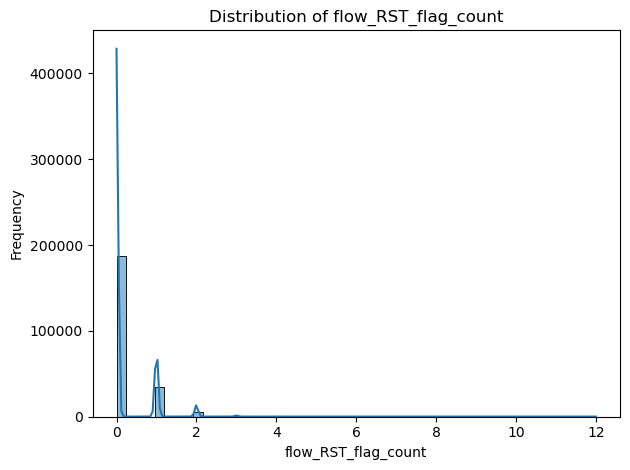

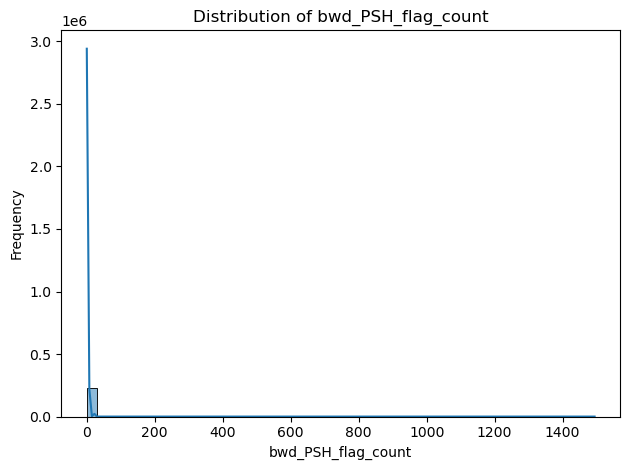

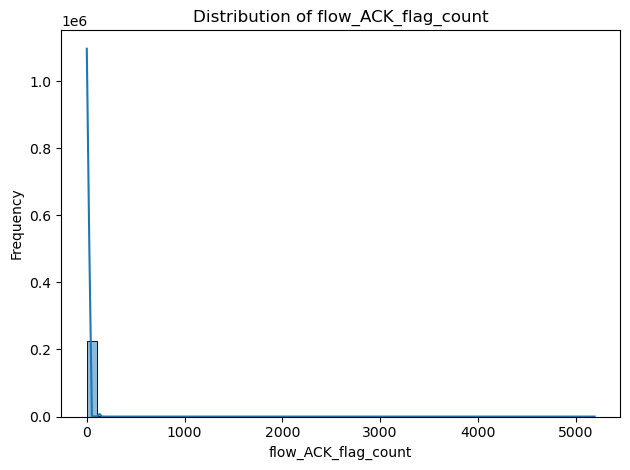

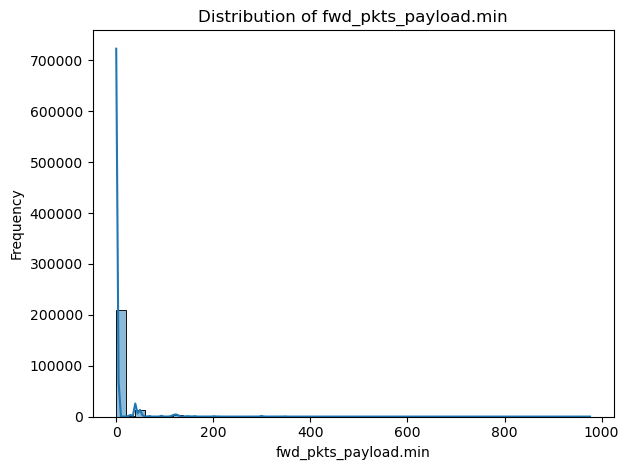

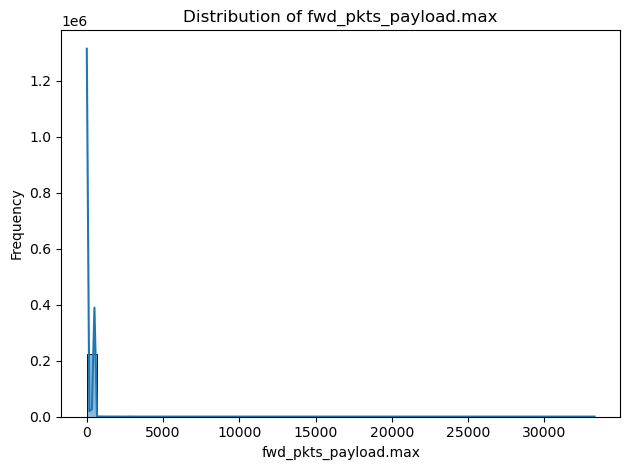

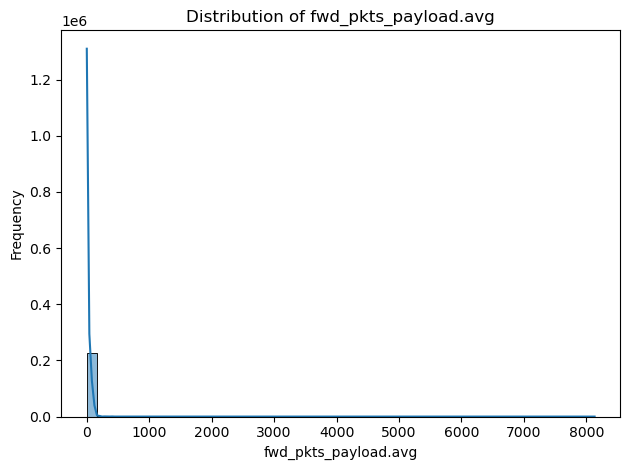

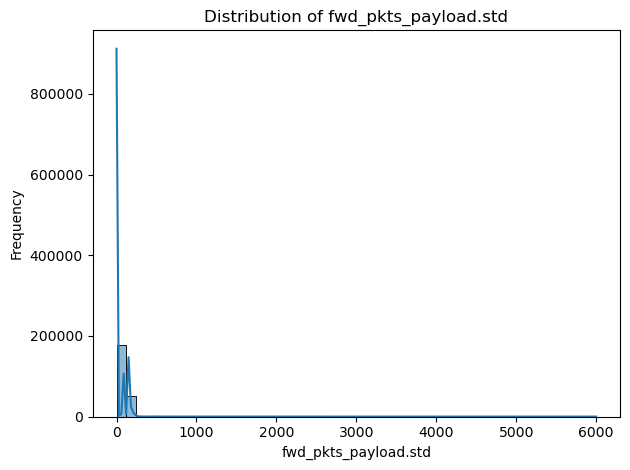

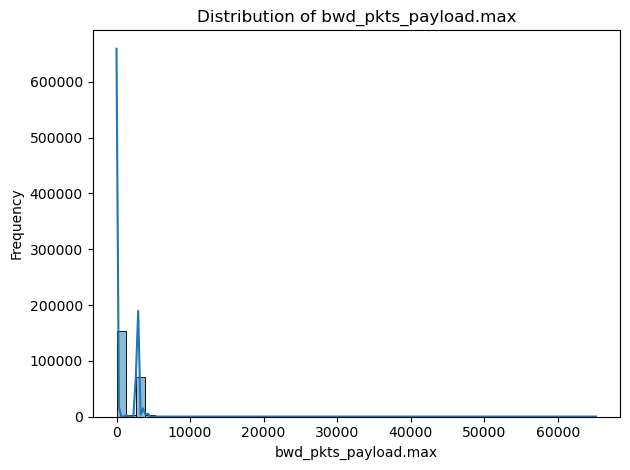

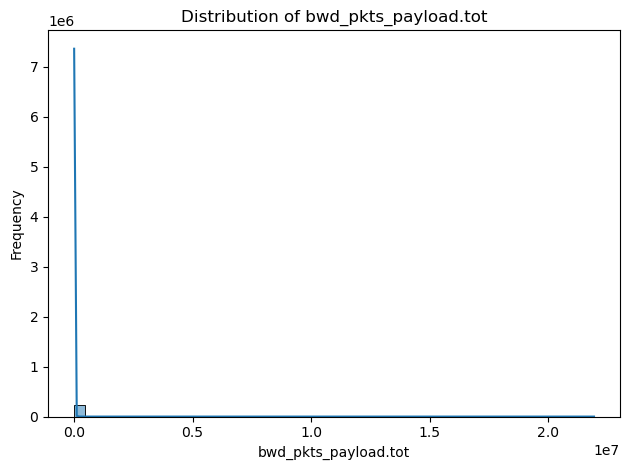

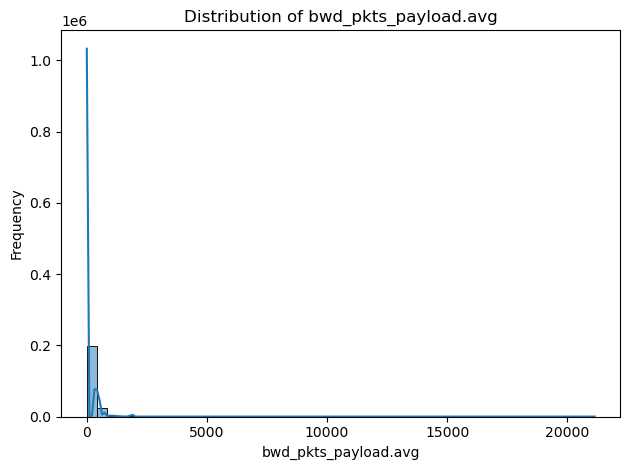

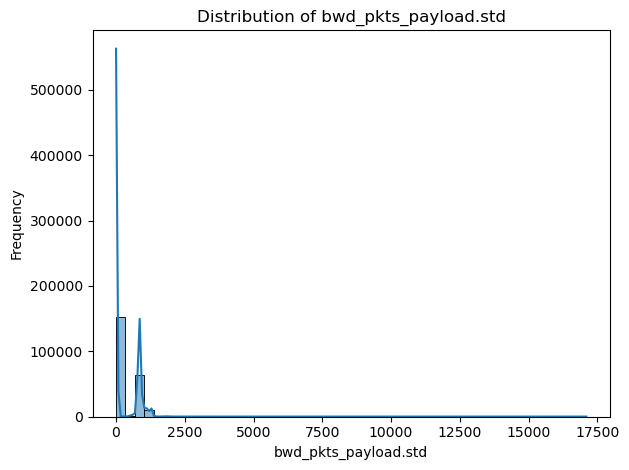

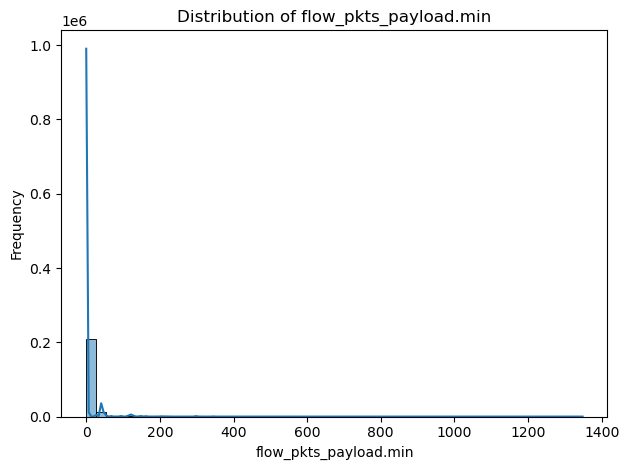

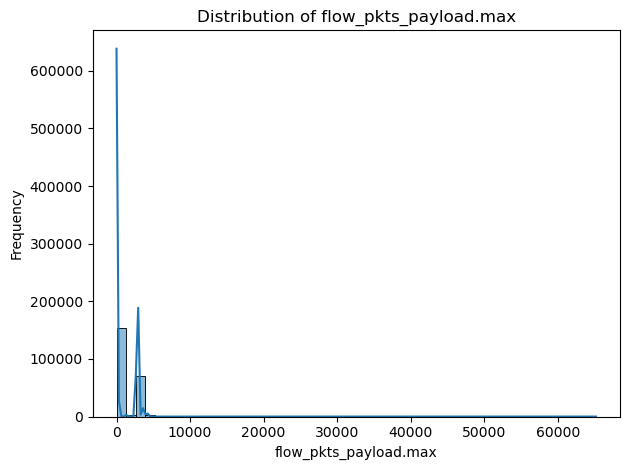

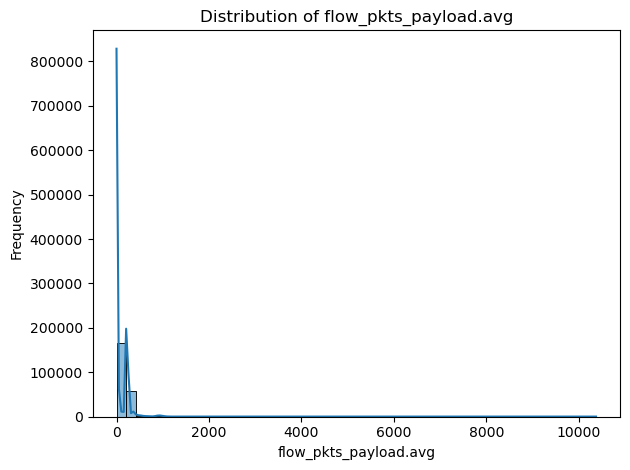

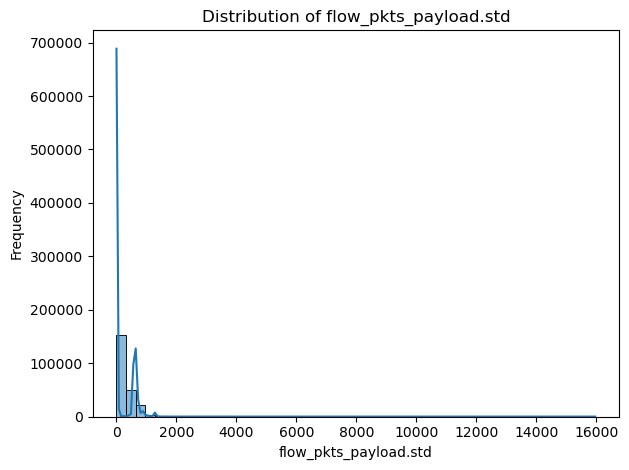

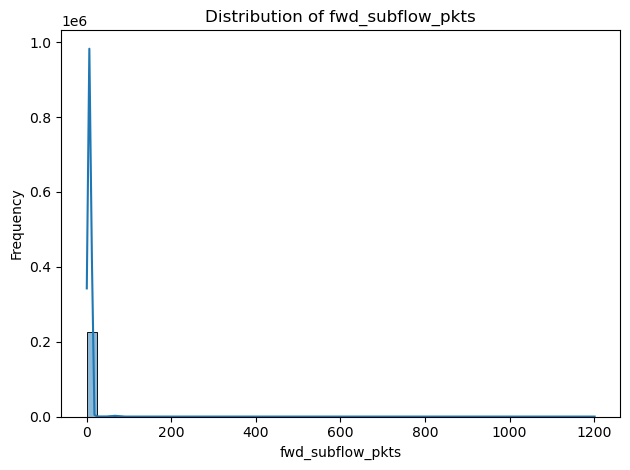

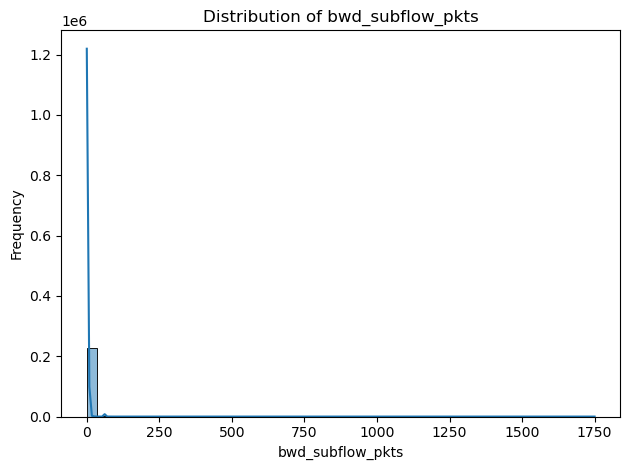

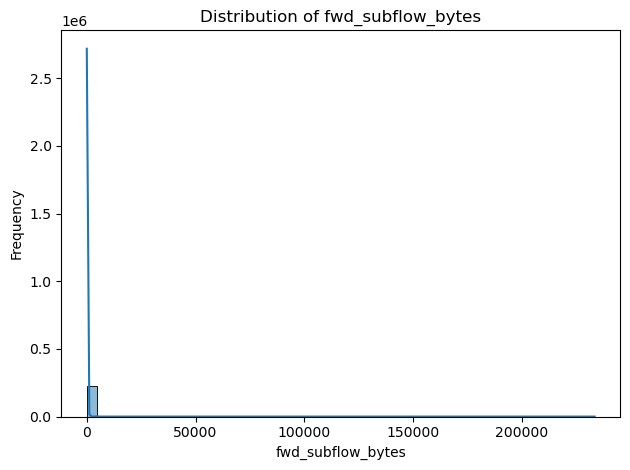

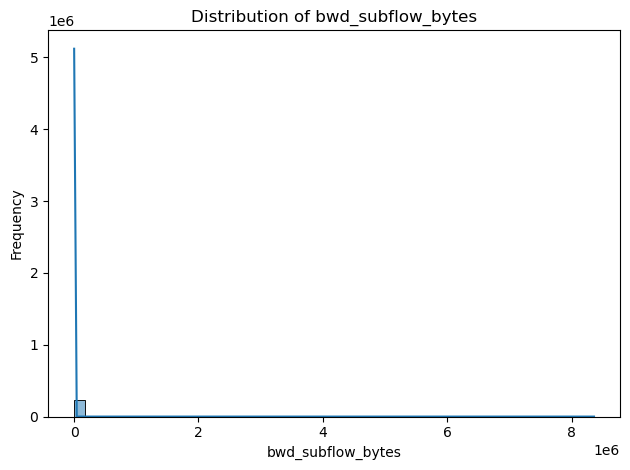

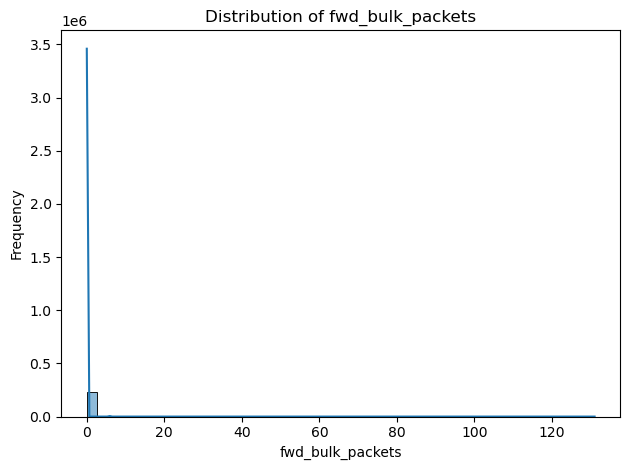

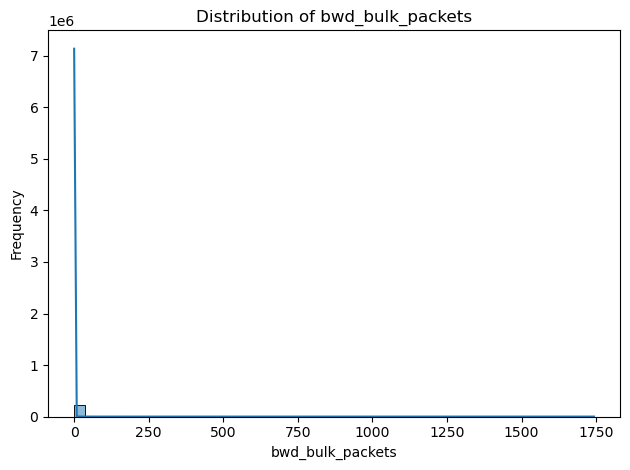

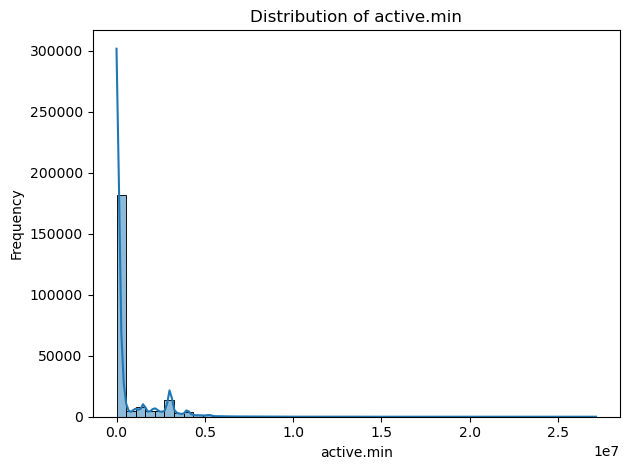

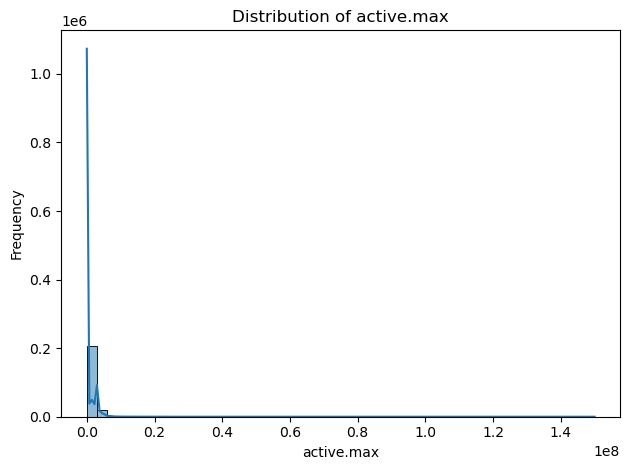

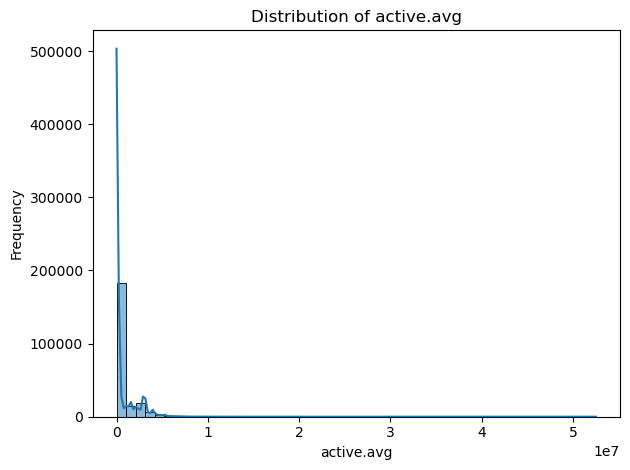

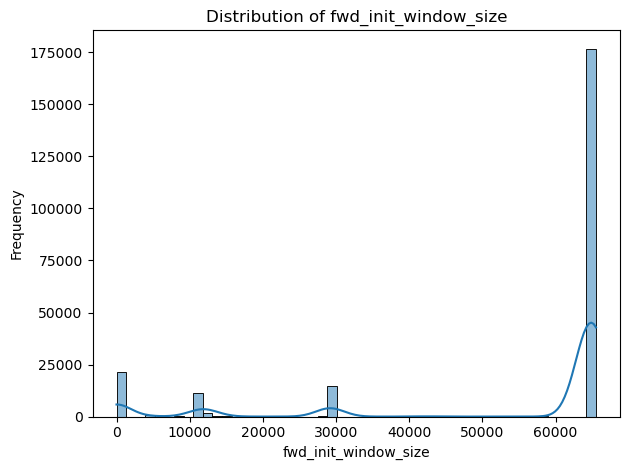

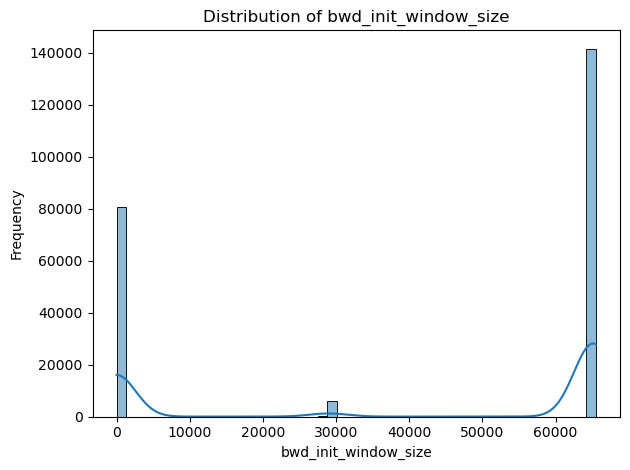

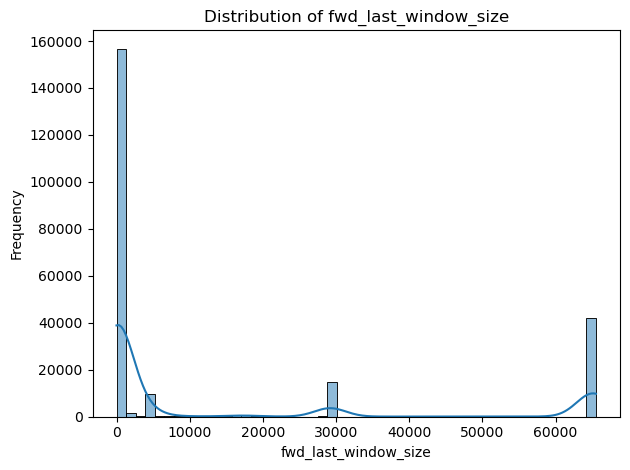

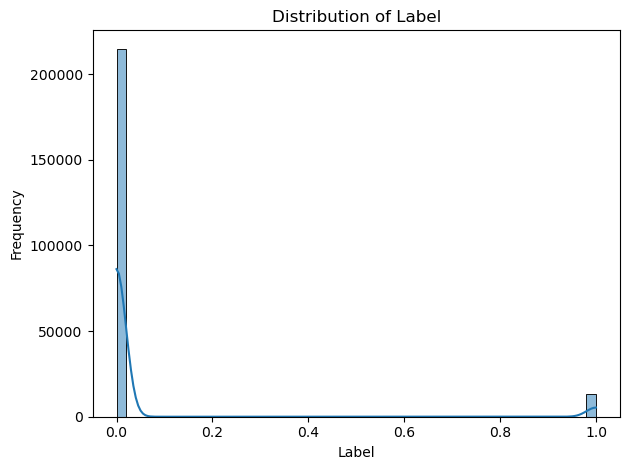

In [18]:
variables = relevant_features
    
# Histograms 
plt.figure(figsize=(15, 5))
for i, variable in enumerate(variables):
    sns.histplot(hikari_2022[variable], bins=50, kde=True)
    plt.title(f'Distribution of {variable}')
    plt.xlabel(variable)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()